In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest# 환경 설정

import matplotlib
# 한글 설치(윈도우 버전)
matplotlib.rc('font',family='Malgun Gothic')
# 음수 표시
matplotlib.rc('axes',unicode_minus=False)
# 그래프 출력
%matplotlib inline

# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

### 분석 과정

- 1) 시간대별 어떤 품목이 많이 판매되었는지 -> 어떤걸 도출할 수 있는가?
  2) 연령대별로 어떤 시간대에 거래가 많이되었는지
  3) 연령대별로 구매품목 특성
  4) 연령대별 구독현황 분석
  5) 트랜드차트 -> 대상품목 -> ARIMA

In [3]:
df = pd.read_csv('real_final_data.csv')
df.head()

,Unnamed: 0,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,주문취소여부,...,구독여부,주소지,세부주소지,물품명,물품대분류,물품중분류,식품/비식품,냉장여부,개당 구매금액,물품금액
0,0,1032097472,정상회원,1.0,7083,2022-01-08,-,-,0,주문취소,...,False,경기도,화성시,유정란/친환경,알,논지엠오유정란,0,1,7083.0,9923
1,1,1032097472,정상회원,1.0,10338,2022-09-16,2022-09-17 00:00:00,2022-09-18 00:00:00,0,주문완료,...,False,경기도,화성시,유정란/친환경,알,논지엠오유정란,0,1,10338.0,9923
2,2,1032097472,정상회원,1.0,10338,2022-06-18,2022-06-18 00:00:00,2022-06-18 00:00:00,0,주문완료,...,False,경기도,화성시,유정란/친환경,알,논지엠오유정란,0,1,10338.0,9923
3,3,1032097472,정상회원,1.0,10338,2022-04-02,2022-04-02 00:00:00,2022-04-02 00:00:00,0,주문완료,...,False,경기도,화성시,유정란/친환경,알,논지엠오유정란,0,1,10338.0,9923
4,4,1032097472,정상회원,1.0,8615,2022-05-07,2022-05-07 00:00:00,2022-05-08 00:00:00,0,주문완료,...,False,경기도,화성시,유정란/친환경,알,논지엠오유정란,0,1,8615.0,9923


In [4]:
def func1(x):
    if pd.isnull(x):
        return '미확인'
    elif x>=60:
        return '60대 이상'
    else : 
        return str(x)[0]+'0대'

df['연령대'] = df['나이'].apply(func1)
df['연령대'].value_counts()

연령대
30대       233452
40대       197713
50대       103443
60대 이상     69942
20대        58082
10대          478
Name: count, dtype: int64

In [5]:
df['연령대'].value_counts()

연령대
30대       233452
40대       197713
50대       103443
60대 이상     69942
20대        58082
10대          478
Name: count, dtype: int64

In [6]:
df[['연령대']]

,연령대
0,30대
1,30대
2,30대
3,30대
4,30대
...,...
663105,30대
663106,20대
663107,40대
663108,60대 이상


In [7]:
df.iloc[451808:451810]

,Unnamed: 0,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,주문취소여부,...,주소지,세부주소지,물품명,물품대분류,물품중분류,식품/비식품,냉장여부,개당 구매금액,물품금액,연령대
451808,453456,281649856,정상회원,1.0,6700,2022-04-24,2022-04-24 00:00:00,2022-04-25 00:00:00,0,주문완료,...,인천광역시,부평구,물사랑 주방용물비누,세제/세안,주방용비누,1,1,6700.0,11048,30대
451809,453457,281649856,정상회원,1.0,6700,2022-06-03,2022-06-03 00:00:00,2022-06-03 00:00:00,5560,주문완료,...,인천광역시,부평구,물사랑 주방용물비누,세제/세안,주방용비누,1,1,6700.0,11048,30대


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663110 entries, 0 to 663109
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   663110 non-null  int64  
 1   회원번호         663110 non-null  int64  
 2   회원상태         663110 non-null  object 
 3   구매수량         663110 non-null  float64
 4   구매금액         663110 non-null  int64  
 5   주문일시         663110 non-null  object 
 6   배송시작일        663110 non-null  object 
 7   배송완료일        663110 non-null  object 
 8   사용 적립금       663110 non-null  int64  
 9   주문취소여부       663110 non-null  object 
 10  주문시간         663110 non-null  object 
 11  제품번호         663110 non-null  object 
 12  배송시작일부터완료일   663110 non-null  object 
 13  주문일시부터배송완료일  663110 non-null  object 
 14  성별           663110 non-null  object 
 15  나이           663110 non-null  int64  
 16  등록카드         663110 non-null  object 
 17  결혼           663110 non-null  object 
 18  구독여부         663110 non-

In [9]:
# '주문시간'을 24시간 형식으로 변환
def convert_to_24_hour(time_str):
    period, time = time_str.split()
    hour, minute = map(int, time.split(':'))
    if period == '오후' and hour != 12:
        hour += 12
    elif period == '오전' and hour == 12:
        hour = 0
    return hour * 100 + minute
df['주문시간_24'] = df['주문시간'].apply(convert_to_24_hour)
# '시간대' 칼럼 생성
def determine_time_period(time):
    if 2100 <= time or time < 300:
        return '밤'
    elif 300 <= time < 600:
        return '새벽'
    elif 600 <= time < 1200:
        return '아침'
    elif 1200 <= time < 1700:
        return '낮'
    else:
        return '저녁'
df['시간대'] = df['주문시간_24'].apply(determine_time_period)
# '주문시간_24' 칼럼 삭제 (선택 사항)
df.drop(columns=['주문시간_24'], inplace=True)

In [10]:
df['시간대'].value_counts()

시간대
낮     248467
밤     167685
저녁    132323
아침     77253
새벽     37382
Name: count, dtype: int64

In [11]:
df

,Unnamed: 0,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,주문취소여부,...,세부주소지,물품명,물품대분류,물품중분류,식품/비식품,냉장여부,개당 구매금액,물품금액,연령대,시간대
0,0,1032097472,정상회원,1.0,7083,2022-01-08,-,-,0,주문취소,...,화성시,유정란/친환경,알,논지엠오유정란,0,1,7083.0,9923,30대,낮
1,1,1032097472,정상회원,1.0,10338,2022-09-16,2022-09-17 00:00:00,2022-09-18 00:00:00,0,주문완료,...,화성시,유정란/친환경,알,논지엠오유정란,0,1,10338.0,9923,30대,밤
2,2,1032097472,정상회원,1.0,10338,2022-06-18,2022-06-18 00:00:00,2022-06-18 00:00:00,0,주문완료,...,화성시,유정란/친환경,알,논지엠오유정란,0,1,10338.0,9923,30대,저녁
3,3,1032097472,정상회원,1.0,10338,2022-04-02,2022-04-02 00:00:00,2022-04-02 00:00:00,0,주문완료,...,화성시,유정란/친환경,알,논지엠오유정란,0,1,10338.0,9923,30대,저녁
4,4,1032097472,정상회원,1.0,8615,2022-05-07,2022-05-07 00:00:00,2022-05-08 00:00:00,0,주문완료,...,화성시,유정란/친환경,알,논지엠오유정란,0,1,8615.0,9923,30대,낮
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663105,667362,734192768,정상회원,1.0,30631,2022-05-01,2022-05-02 00:00:00,2022-05-03 00:00:00,0,주문완료,...,울주군,불고기구이판,식기/편백,옹기,1,1,30631.0,30631,30대,밤
663106,667363,1352610112,정상회원,1.0,122523,2022-10-31,2022-10-31 00:00:00,2022-10-31 00:00:00,0,주문완료,...,창원시,옻칠 주발모음,식기/편백,옻칠,0,1,122523.0,122523,20대,밤
663107,667364,1556603072,정상회원,1.0,56475,2022-10-29,2022-10-29 00:00:00,2022-10-31 00:00:00,0,주문완료,...,영광군,국화차모음,차,잎꽃차,0,1,56475.0,56475,40대,아침
663108,667365,686955712,정상회원,1.0,109122,2022-06-12,2022-06-13 00:00:00,2022-06-13 00:00:00,0,주문완료,...,금정구,편백나무큐브목베개모음,식기/편백,편백,0,1,109122.0,109122,60대 이상,아침


In [12]:
# 시간대별로 물품명과 구매수량 집계
time_period_item_sales = df.groupby(['시간대', '물품명'])['구매수량'].sum().reset_index()
time_period_item_sales.sort_values(by='구매수량',ascending=False).head(30)

,시간대,물품명,구매수량
375,낮,두부,13270.0
1245,낮,유정란/친환경,11605.0
2171,밤,두부,9031.0
3013,밤,유정란/친환경,7648.0
7092,저녁,두부,7072.0
7920,저녁,유정란/친환경,6145.0
1521,낮,콩나물,6108.0
1408,낮,찌개용두부,4676.0
5429,아침,두부,3994.0
3279,밤,콩나물,3921.0


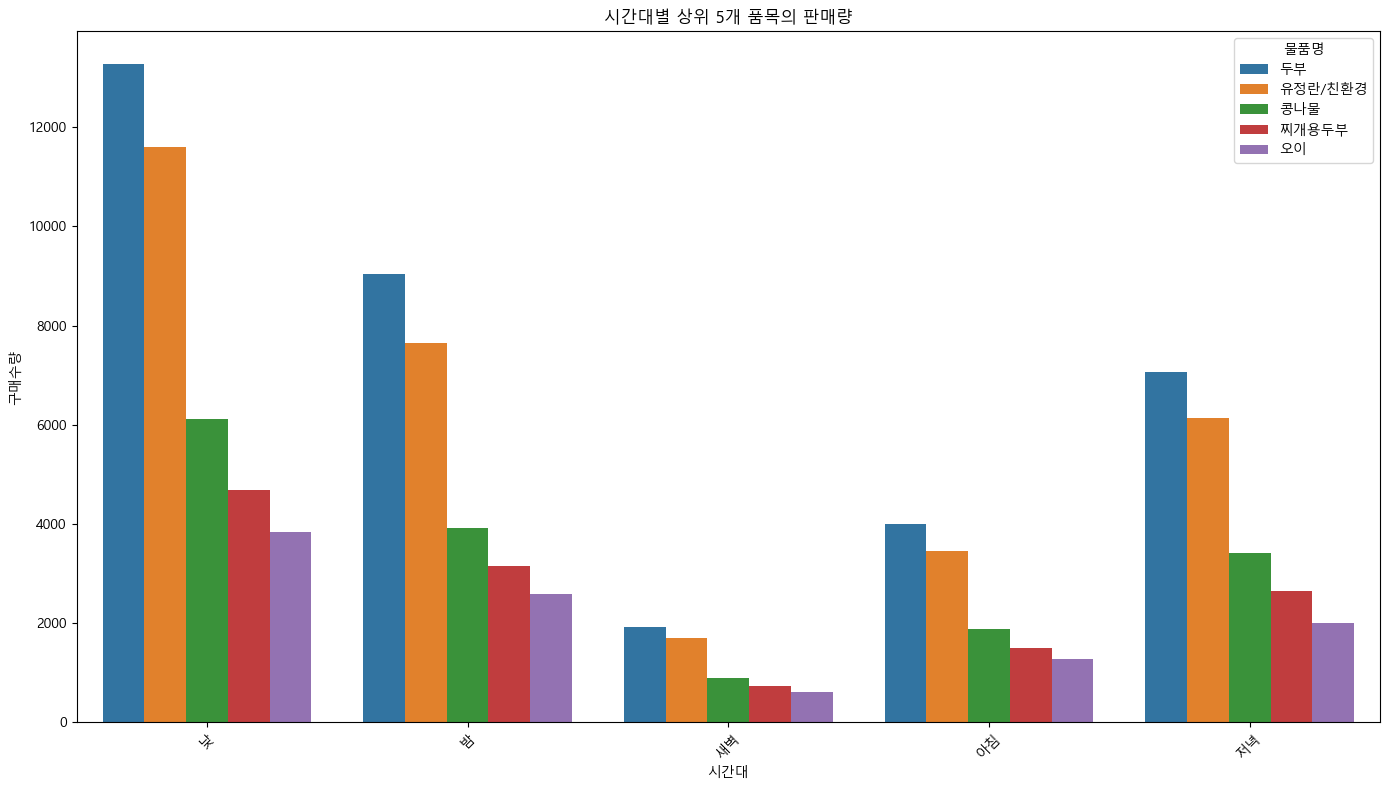

In [13]:
# 시간대별로 물품명과 구매수량 집계
time_period_item_sales = df.groupby(['시간대', '물품명'])['구매수량'].sum().reset_index()

# 각 시간대별로 상위 5개 품목 선택
top_items_per_time_period = time_period_item_sales.groupby('시간대').apply(lambda x: x.nlargest(5, '구매수량')).reset_index(drop=True)

# 그래프 그리기
plt.figure(figsize=(14, 8))
sns.barplot(data=top_items_per_time_period, x='시간대', y='구매수량', hue='물품명', ci=None)
plt.title('시간대별 상위 5개 품목의 판매량')
plt.xlabel('시간대')
plt.ylabel('구매수량')
plt.legend(title='물품명')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [14]:
# 교차표 생성
contingency_table = pd.crosstab(time_period_item_sales['시간대'], time_period_item_sales['물품명'], values=time_period_item_sales['구매수량'], aggfunc=np.sum)
contingency_table.head(30)

물품명,2단무늬컵,7곡딸기롤과자,7곡참식,가리비,가마솥3인용,가마솥5인용,가브리살,가브리살-성남용인,가시복분자원액,가시복분자즙,...,흑미쌀과자,흑미쌀쿠키,흑미참식,흑방울토마토_500g,흑수박,흑염소진액,흑임자구름떡,흑임자인절미,흑토마토,흰밀가루
시간대,,,,,,,,,,,,,,,,,,,,,
낮,NaN,368.0,73.0,27.0,NaN,NaN,14.0,27.0,17.0,83.0,...,113.0,33.0,50.0,14.0,13.0,315.0,112.0,230.0,119.0,230.0
밤,NaN,223.0,62.0,18.0,1.0,NaN,7.0,20.0,20.0,34.0,...,76.0,17.0,29.0,9.0,4.0,185.0,66.0,178.0,70.0,140.0
새벽,NaN,37.0,7.0,7.0,NaN,NaN,3.0,5.0,10.0,15.0,...,25.0,3.0,8.0,NaN,2.0,51.0,21.0,34.0,12.0,27.0
아침,NaN,89.0,29.0,6.0,NaN,NaN,2.0,9.0,7.0,27.0,...,23.0,10.0,16.0,4.0,5.0,61.0,40.0,65.0,36.0,65.0
저녁,1.0,202.0,40.0,21.0,NaN,1.0,4.0,23.0,16.0,41.0,...,67.0,23.0,18.0,4.0,11.0,154.0,59.0,133.0,54.0,126.0


In [15]:
# NaN 값을 0으로 대체
contingency_table = contingency_table.fillna(0)

# 카이제곱 검정 수행
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table, correction=False)

# 결과 출력
print('교차표:')
print(contingency_table)
print('\n카이제곱 검정 결과:')
print(f'Chi-Square Statistic: {chi2_stat:.4f}')
print(f'P-Value: {p_value:.4f}')
print(f'Degrees of Freedom: {dof}')
print('Expected Frequencies:')
print(expected)

교차표:
물품명  2단무늬컵  7곡딸기롤과자  7곡참식   가리비  가마솥3인용  가마솥5인용  가브리살  가브리살-성남용인  가시복분자원액  \
시간대                                                                         
낮      0.0    368.0  73.0  27.0     0.0     0.0  14.0       27.0     17.0   
밤      0.0    223.0  62.0  18.0     1.0     0.0   7.0       20.0     20.0   
새벽     0.0     37.0   7.0   7.0     0.0     0.0   3.0        5.0     10.0   
아침     0.0     89.0  29.0   6.0     0.0     0.0   2.0        9.0      7.0   
저녁     1.0    202.0  40.0  21.0     0.0     1.0   4.0       23.0     16.0   

물품명  가시복분자즙  ...  흑미쌀과자  흑미쌀쿠키  흑미참식  흑방울토마토_500g   흑수박  흑염소진액  흑임자구름떡  \
시간대          ...                                                         
낮      83.0  ...  113.0   33.0  50.0         14.0  13.0  315.0   112.0   
밤      34.0  ...   76.0   17.0  29.0          9.0   4.0  185.0    66.0   
새벽     15.0  ...   25.0    3.0   8.0          0.0   2.0   51.0    21.0   
아침     27.0  ...   23.0   10.0  16.0          4.0   5.0   61.0    40.0   
저녁     41.0

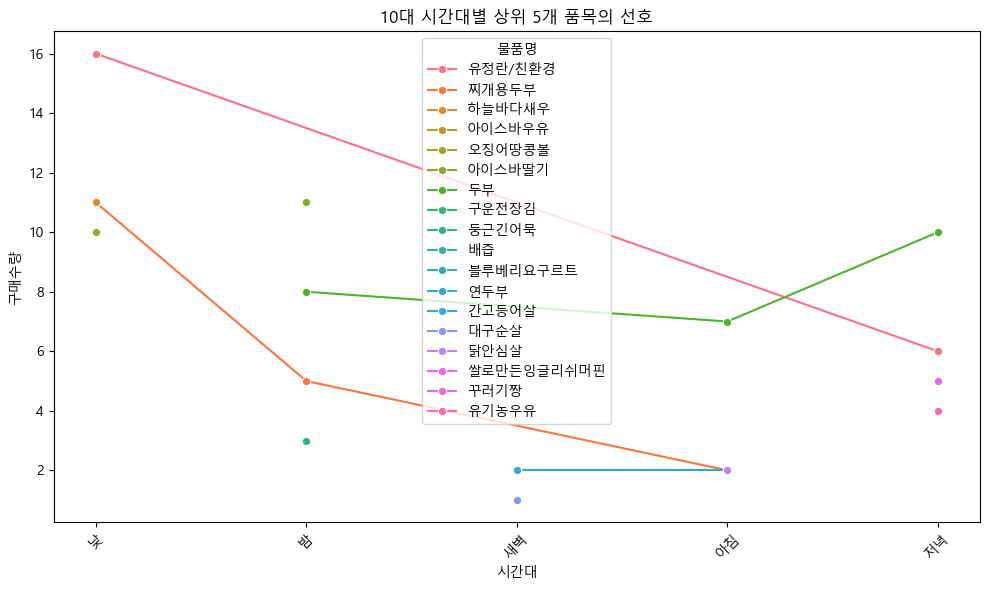

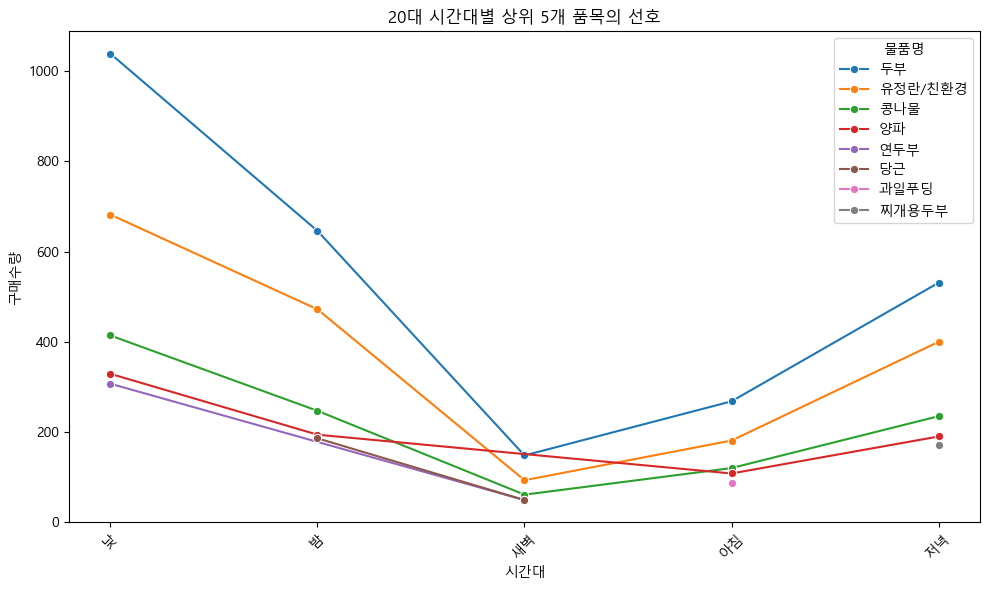

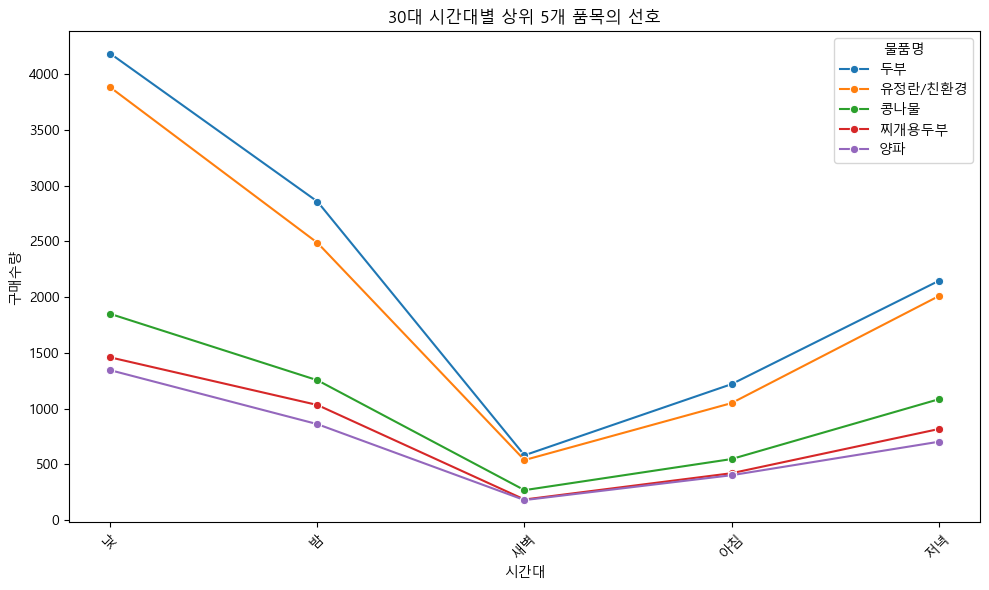

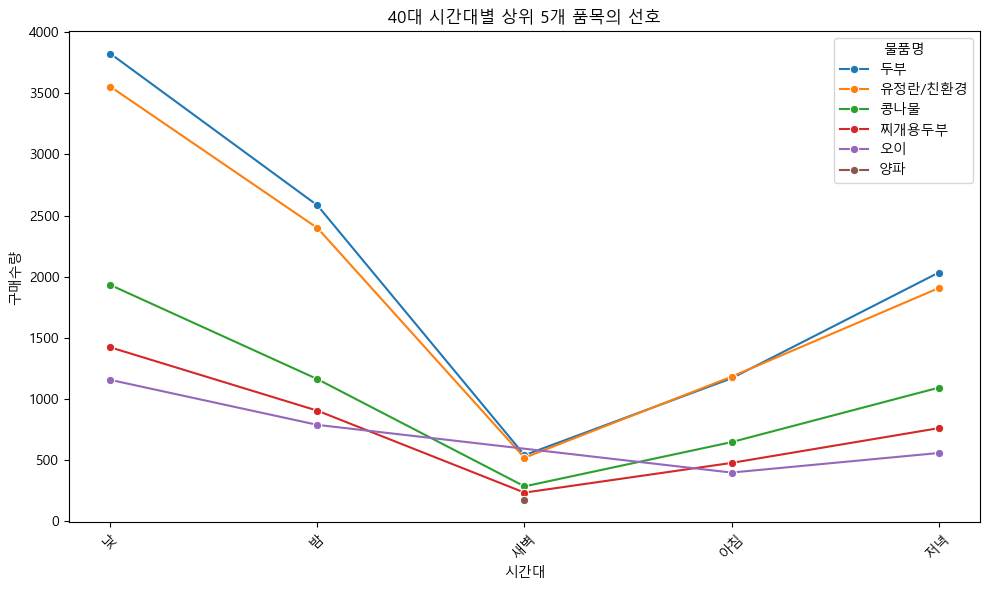

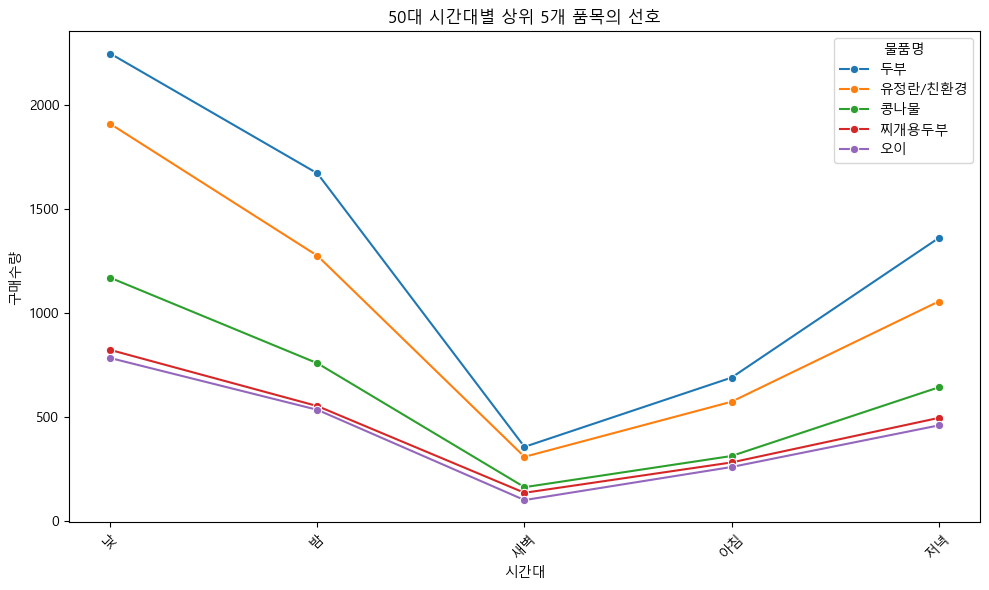

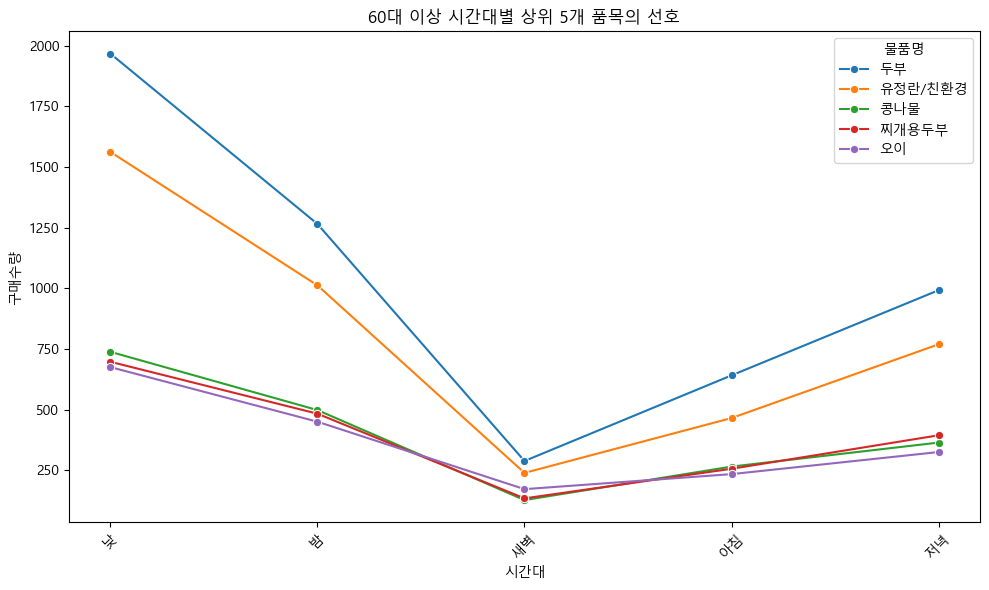

In [16]:
 #시간대별, 연령대별로 물품명과 구매수량 집계
time_period_age_item_sales = df.groupby(['시간대', '연령대', '물품명'])['구매수량'].sum().reset_index()

# 데이터 준비: 연령대별로 시간대별 품목의 구매수량을 피벗 테이블 형태로 변환
pivot_table = time_period_age_item_sales.pivot_table(index=['연령대', '물품명'], columns='시간대', values='구매수량', fill_value=0).reset_index()

# 각 연령대별로 상위 5개 품목 선택
top_5_items_per_age_group = time_period_age_item_sales.groupby(['연령대', '시간대']).apply(lambda x: x.nlargest(5, '구매수량')).reset_index(drop=True)

# 각 연령대별로 선 그래프를 그리기 위해 데이터를 재구성
for age_group in top_5_items_per_age_group['연령대'].unique():
    age_group_data = top_5_items_per_age_group[top_5_items_per_age_group['연령대'] == age_group]
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=age_group_data, x='시간대', y='구매수량', hue='물품명', marker='o')
    plt.title(f'{age_group} 시간대별 상위 5개 품목의 선호')
    plt.xlabel('시간대')
    plt.ylabel('구매수량')
    plt.legend(title='물품명')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

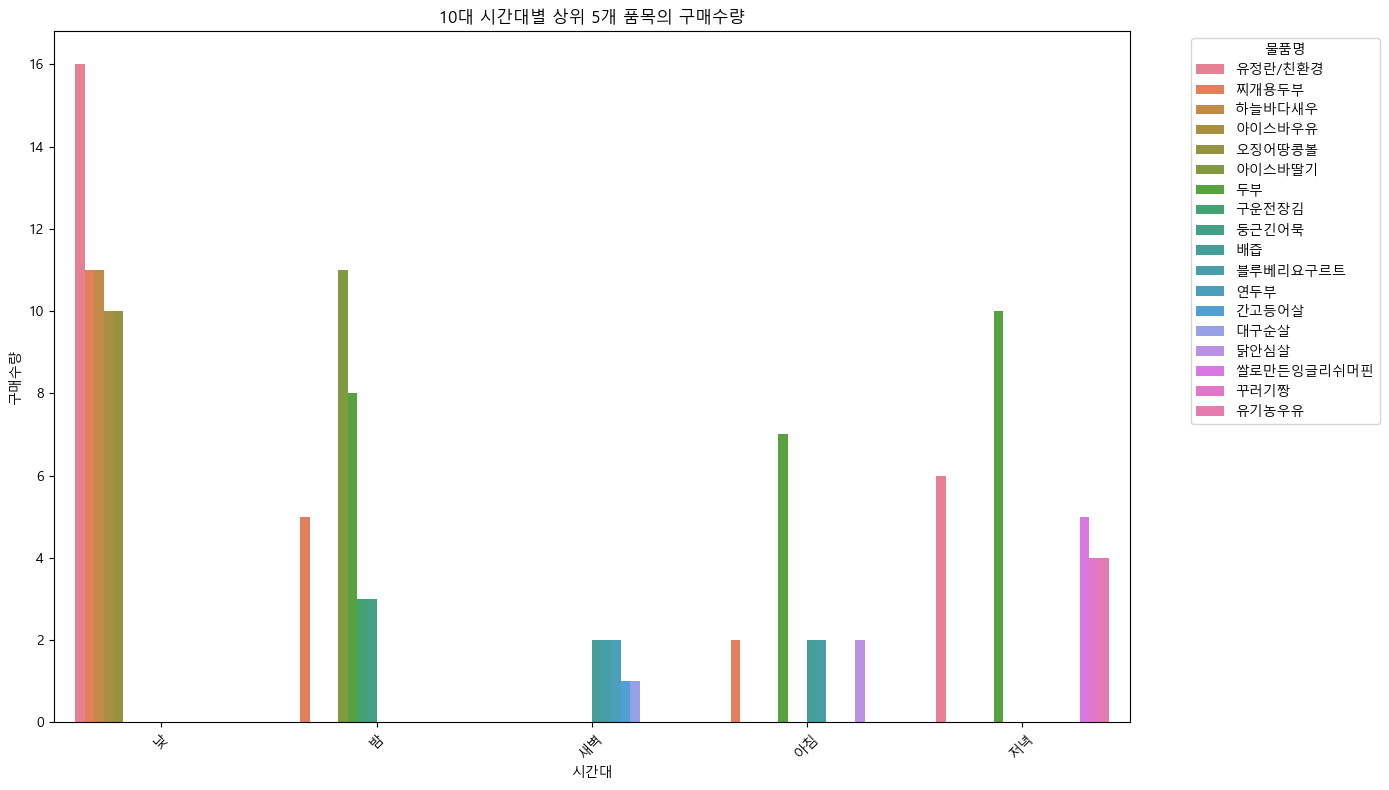

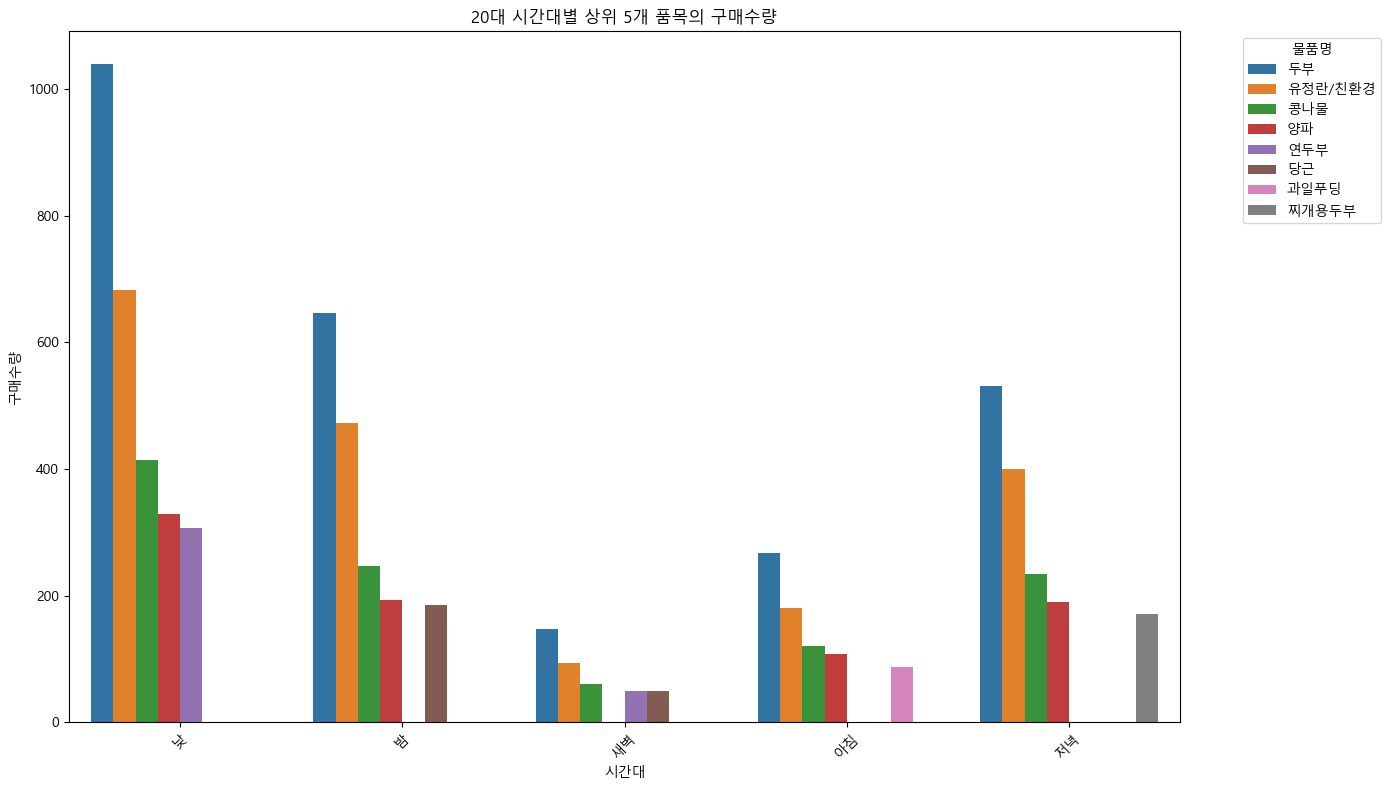

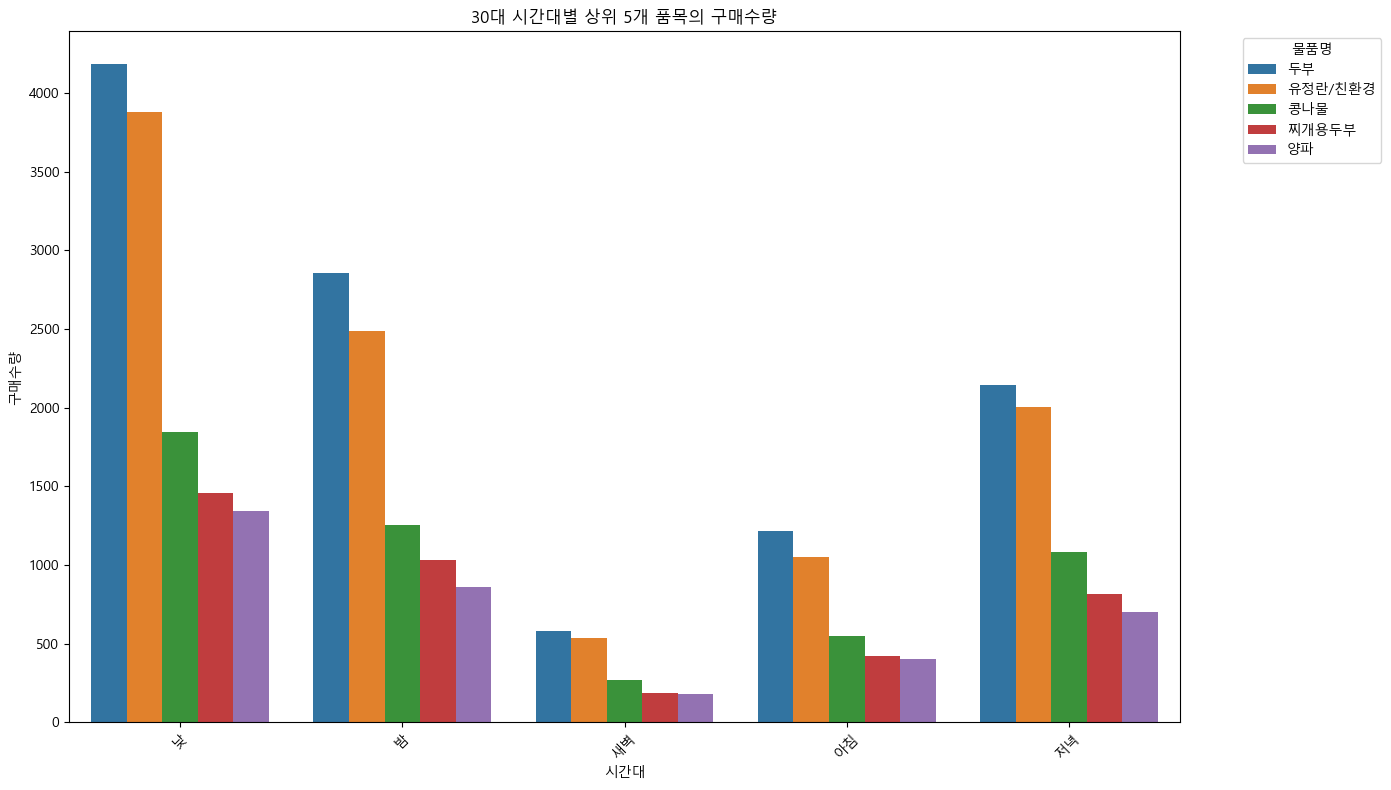

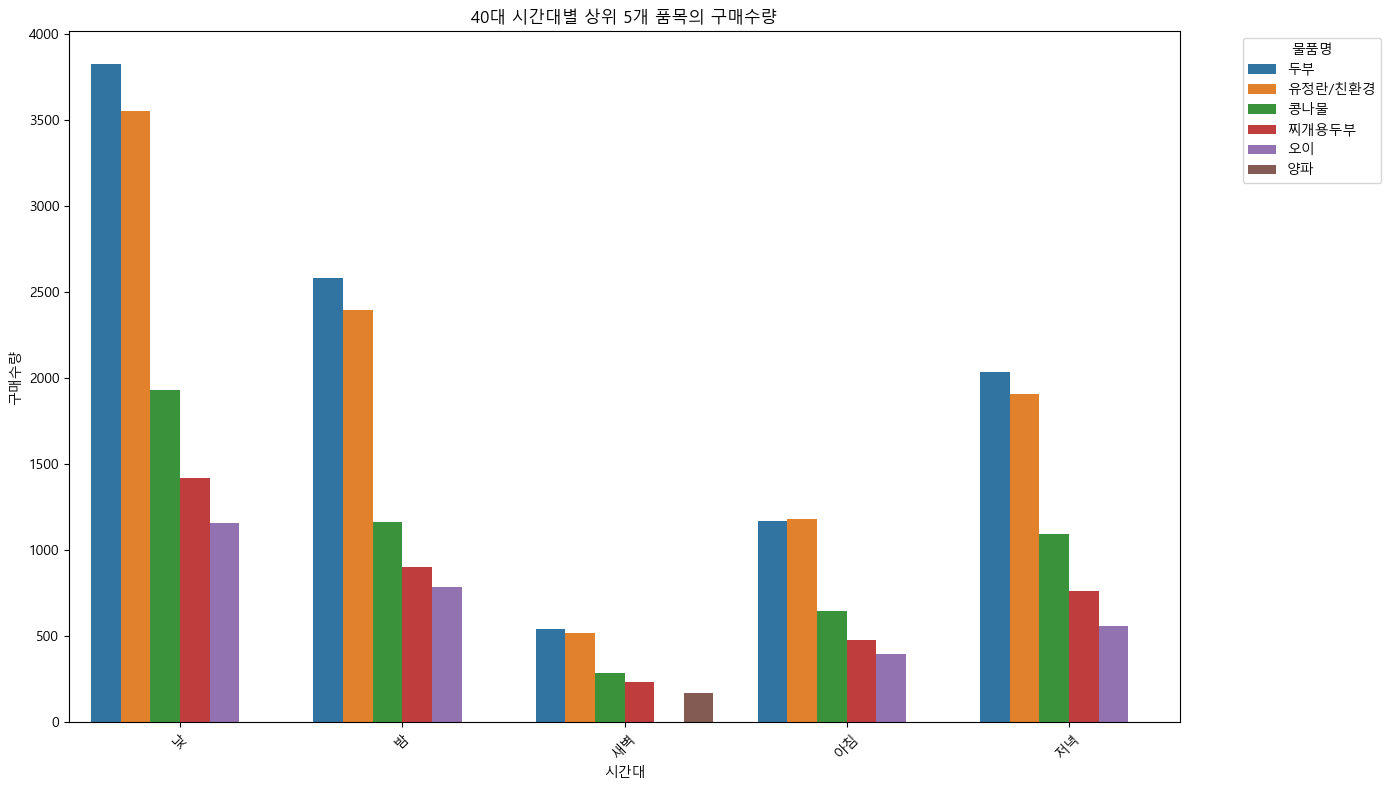

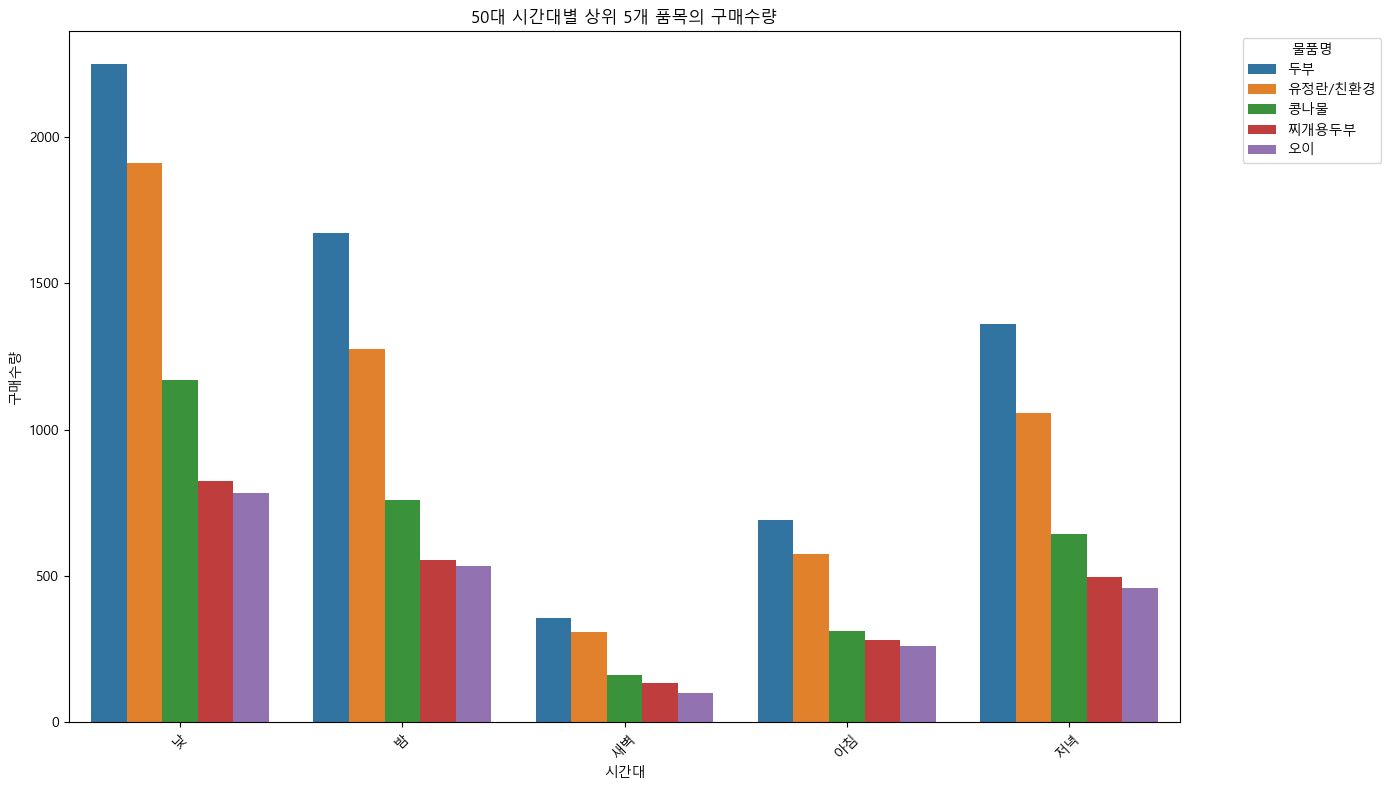

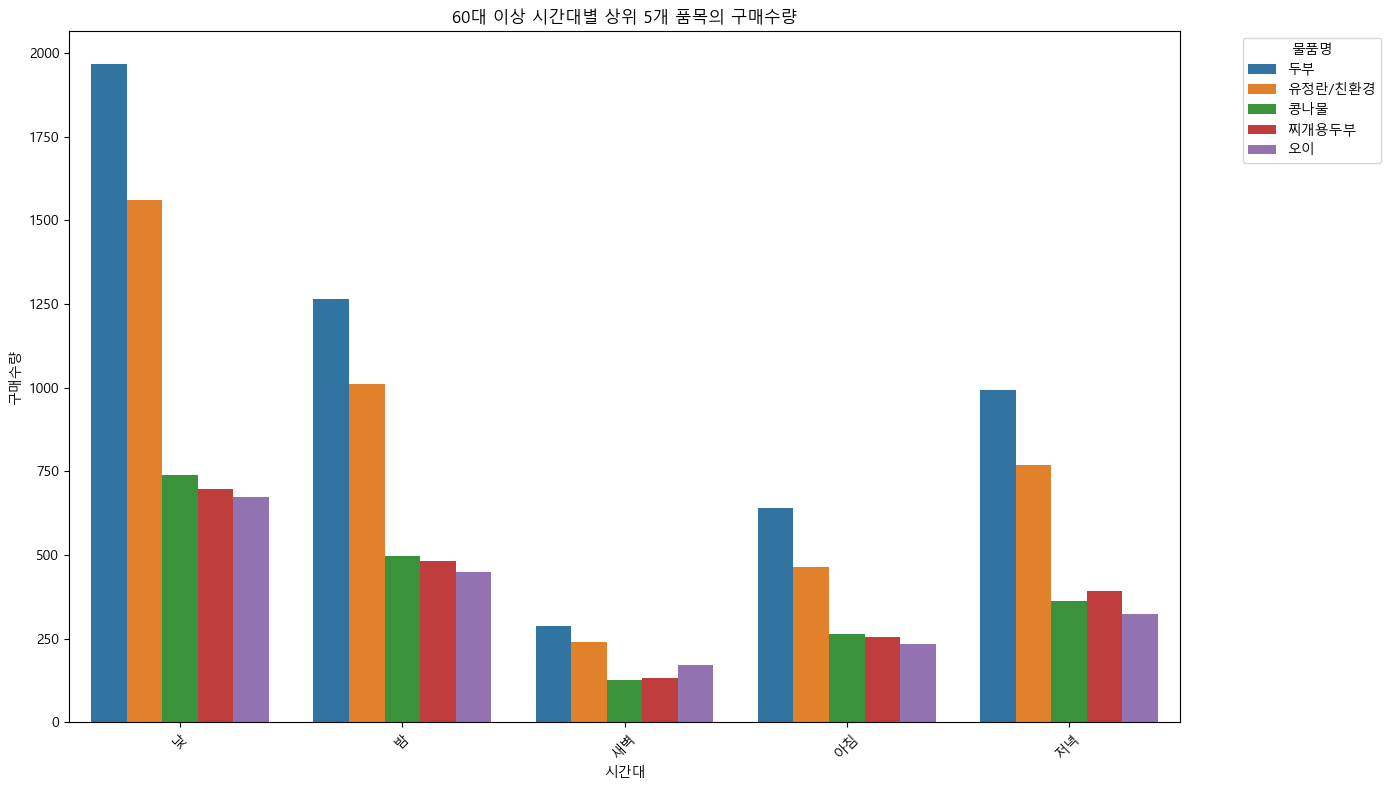

In [17]:
# 시간대별, 연령대별로 물품명과 구매수량 집계
time_period_age_item_sales = df.groupby(['시간대', '연령대', '물품명'])['구매수량'].sum().reset_index()

# 데이터 준비: 연령대별로 시간대별 품목의 구매수량을 피벗 테이블 형태로 변환
pivot_table = time_period_age_item_sales.pivot_table(index=['연령대', '물품명'], columns='시간대', values='구매수량', fill_value=0).reset_index()

# 각 연령대별로 상위 5개 품목 선택
top_5_items_per_age_group = time_period_age_item_sales.groupby(['연령대', '시간대']).apply(lambda x: x.nlargest(5, '구매수량')).reset_index(drop=True)

# 막대 그래프 시각화
for age_group in top_5_items_per_age_group['연령대'].unique():
    age_group_data = top_5_items_per_age_group[top_5_items_per_age_group['연령대'] == age_group]
    
    plt.figure(figsize=(14, 8))
    sns.barplot(data=age_group_data, x='시간대', y='구매수량', hue='물품명', ci=None)
    plt.title(f'{age_group} 시간대별 상위 5개 품목의 구매수량')
    plt.xlabel('시간대')
    plt.ylabel('구매수량')
    plt.legend(title='물품명', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [18]:
# 시간 문자열을 24시간 형식으로 변환하고 30분 단위로 반올림하는 함수
def round_time(time_str):
    period, time = time_str.split(' ')
    hours, minutes = map(int, time.split(':'))
    if period == '오후' and hours != 12:
        hours += 12
    elif period == '오전' and hours == 12:
        hours = 0
    # 분 단위를 반올림
    total_minutes = hours * 60 + minutes
    rounded_minutes = round(total_minutes / 30) * 30
    rounded_hours = rounded_minutes // 60
    rounded_minutes = rounded_minutes % 60
    # 24시간 형식을 다시 오전/오후 형식으로 변환
    if rounded_hours >= 12:
        period = '오후'
        if rounded_hours > 12:
            rounded_hours -= 12
    else:
        period = '오전'
        if rounded_hours == 0:
            rounded_hours = 12
    return f'{period} {rounded_hours:02}:{rounded_minutes:02}'
# 반올림한 주문시간 컬럼 추가
df['반올림 주문시간'] = df['주문시간'].apply(round_time)

In [19]:
df.head()

,Unnamed: 0,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,주문취소여부,...,물품명,물품대분류,물품중분류,식품/비식품,냉장여부,개당 구매금액,물품금액,연령대,시간대,반올림 주문시간
0,0,1032097472,정상회원,1.0,7083,2022-01-08,-,-,0,주문취소,...,유정란/친환경,알,논지엠오유정란,0,1,7083.0,9923,30대,낮,오후 01:00
1,1,1032097472,정상회원,1.0,10338,2022-09-16,2022-09-17 00:00:00,2022-09-18 00:00:00,0,주문완료,...,유정란/친환경,알,논지엠오유정란,0,1,10338.0,9923,30대,밤,오후 10:00
2,2,1032097472,정상회원,1.0,10338,2022-06-18,2022-06-18 00:00:00,2022-06-18 00:00:00,0,주문완료,...,유정란/친환경,알,논지엠오유정란,0,1,10338.0,9923,30대,저녁,오후 08:00
3,3,1032097472,정상회원,1.0,10338,2022-04-02,2022-04-02 00:00:00,2022-04-02 00:00:00,0,주문완료,...,유정란/친환경,알,논지엠오유정란,0,1,10338.0,9923,30대,저녁,오후 07:30
4,4,1032097472,정상회원,1.0,8615,2022-05-07,2022-05-07 00:00:00,2022-05-08 00:00:00,0,주문완료,...,유정란/친환경,알,논지엠오유정란,0,1,8615.0,9923,30대,낮,오후 03:30


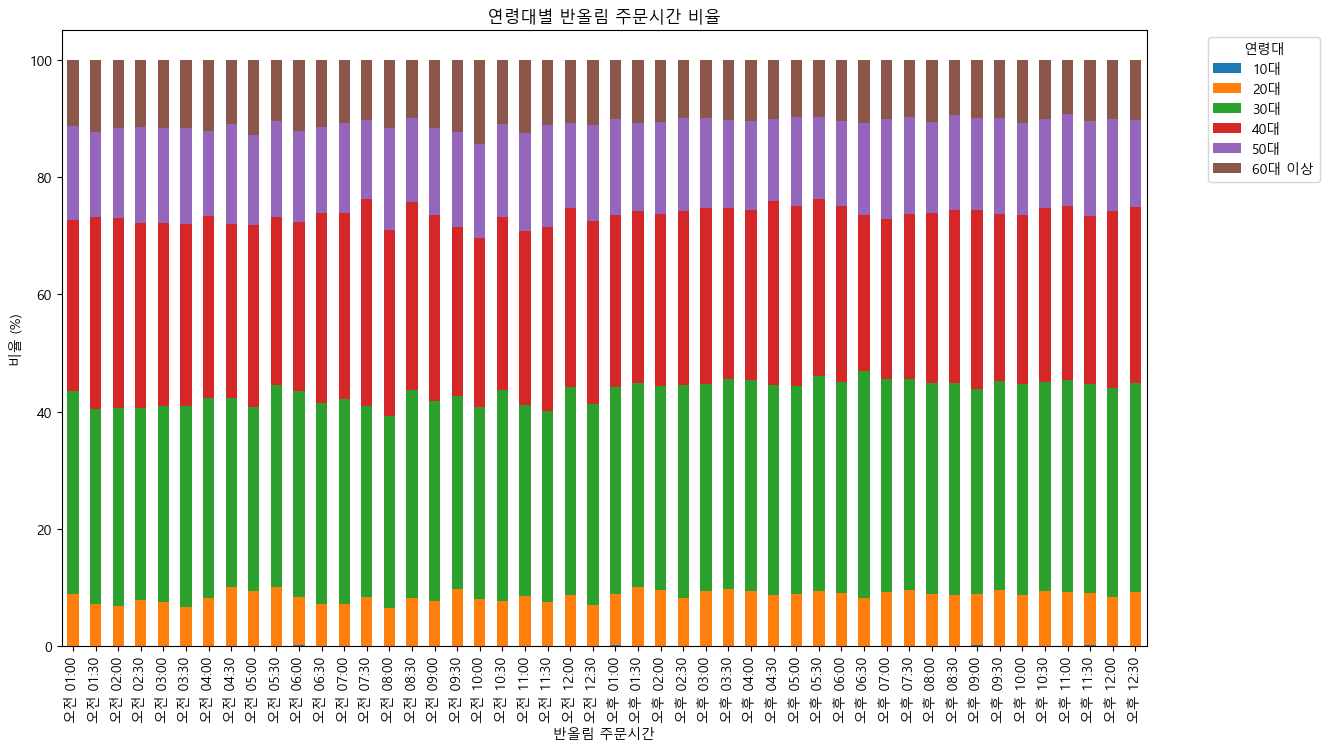

In [20]:
# 연령대별 반올림 주문시간 빈도 계산
age_time_counts = df.groupby(['반올림 주문시간', '연령대']).size().unstack(fill_value=0)
# 연령대별로 비율 계산
age_time_percentages = age_time_counts.div(age_time_counts.sum(axis=1), axis=0) * 100
# 그래프 그리기
age_time_percentages.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('연령대별 반올림 주문시간 비율')
plt.xlabel('반올림 주문시간')
plt.ylabel('비율 (%)')
plt.legend(title='연령대', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [21]:
from scipy.stats import chi2_contingency

# 교차표 생성
contingency_table = pd.crosstab(df['연령대'], df['반올림 주문시간'])

# 카이제곱 검정
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}, p-value: {p}, Degrees of freedom: {dof}")
if p < 0.05:
    print("연령대와 주문 시간대 간의 상관관계가 통계적으로 유의미합니다.")
else:
    print("연령대와 주문 시간대 간의 상관관계가 통계적으로 유의미하지 않습니다.")


Chi2: 2184.728323565261, p-value: 0.0, Degrees of freedom: 235
연령대와 주문 시간대 간의 상관관계가 통계적으로 유의미합니다.


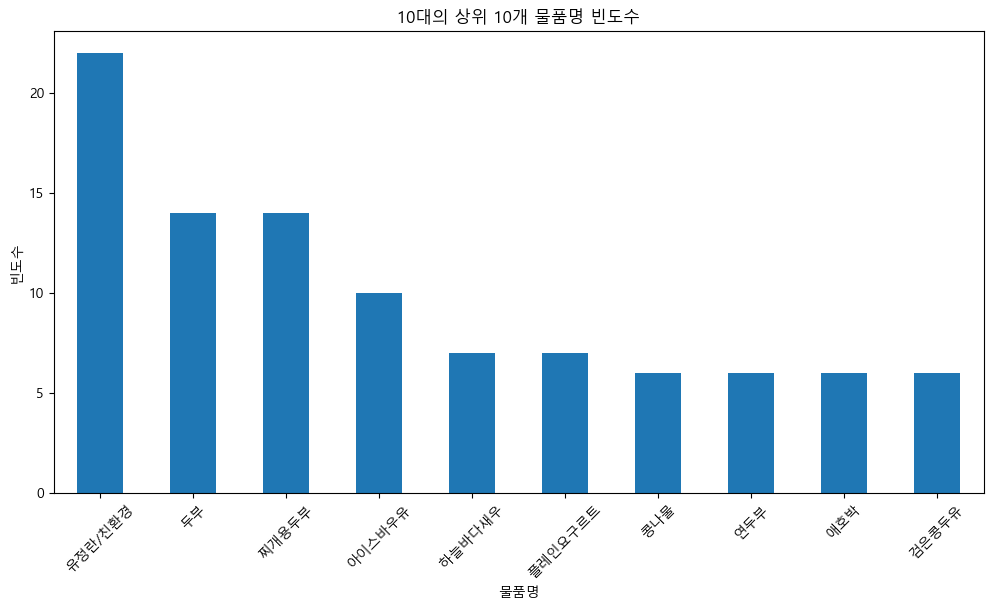

In [22]:
# 10대의 물품명 빈도수 계산
teen_item_counts = df[df['연령대'] == '10대']['물품명'].value_counts()

# 상위 10개의 물품명 선택
top_10_items = teen_item_counts.head(10)

# 막대 그래프로 시각화
plt.figure(figsize=(12, 6))
top_10_items.plot(kind='bar')
plt.title('10대의 상위 10개 물품명 빈도수')
plt.xlabel('물품명')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.show()

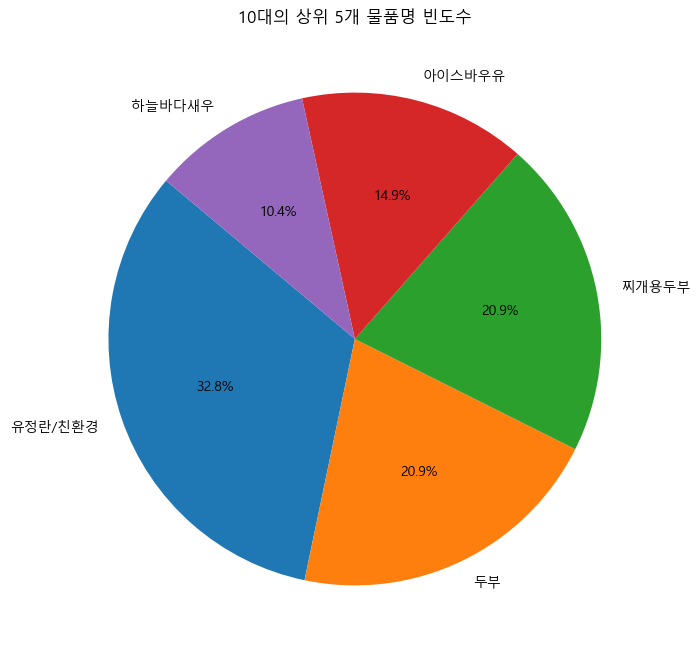

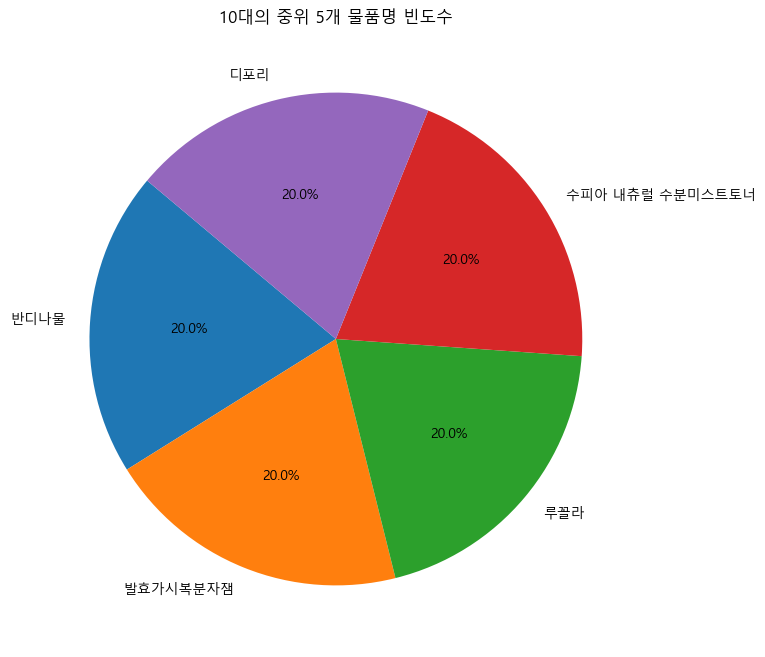

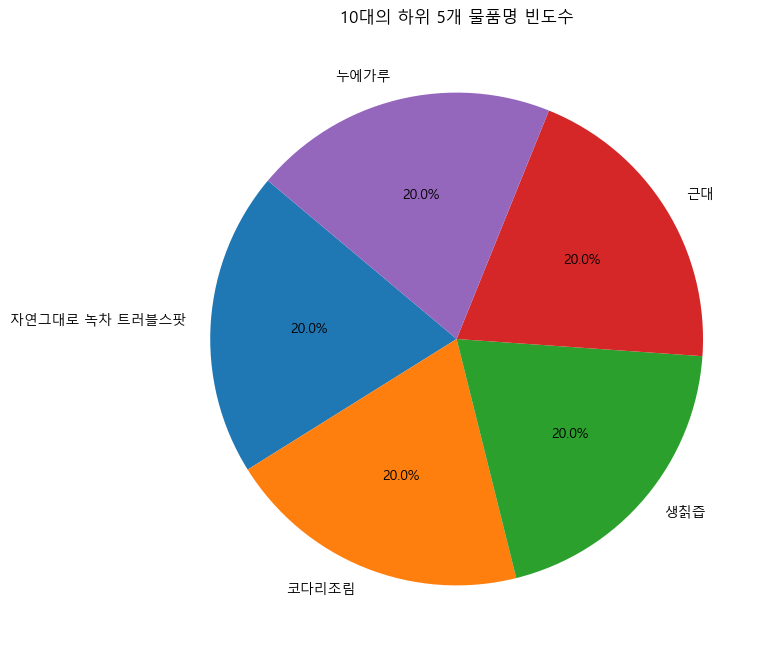

In [23]:
# 10대의 물품명 빈도수 계산
teen_item_counts = df[df['연령대'] == '10대']['물품명'].value_counts()

# 상위 10개의 물품명 선택
top_10_items = teen_item_counts.head(5)

# 중간 10개의 물품명 선택 (중위 -5, +5)
middle_index = len(teen_item_counts) // 2
middle_10_items = teen_item_counts.iloc[middle_index-2:middle_index+3]

# 하위 10개의 물품명 선택
bottom_10_items = teen_item_counts.tail(5)

# 파이 그래프 시각화 함수
def plot_pie_chart(data, title):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

# 상위 10개의 물품명 파이 그래프
plot_pie_chart(top_10_items, '10대의 상위 5개 물품명 빈도수')

# 중간 10개의 물품명 파이 그래프
plot_pie_chart(middle_10_items, '10대의 중위 5개 물품명 빈도수')

# 하위 10개의 물품명 파이 그래프
plot_pie_chart(bottom_10_items, '10대의 하위 5개 물품명 빈도수')

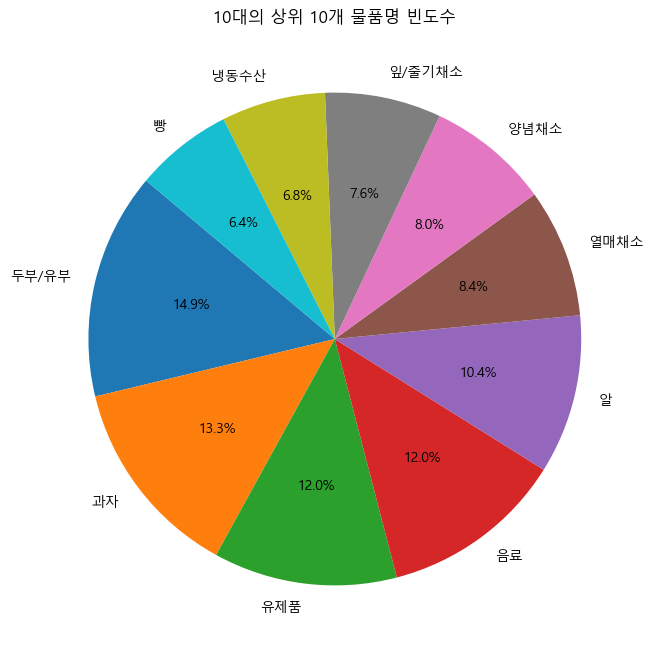

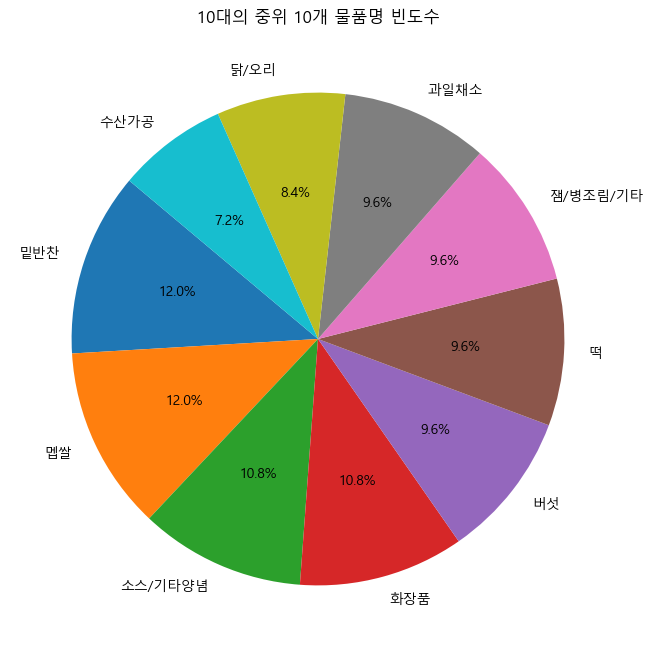

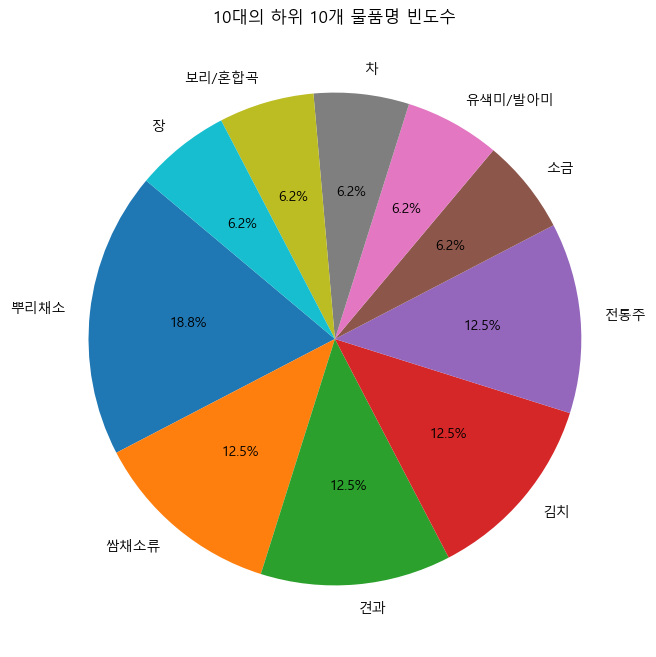

In [24]:
# 10대의 물품명 빈도수 계산
teen_item_counts = df[df['연령대'] == '10대']['물품대분류'].value_counts()

# 상위 10개의 물품명 선택
top_10_items = teen_item_counts.head(10)

# 중간 10개의 물품명 선택 (중위 -5, +5)
middle_index = len(teen_item_counts) // 2
middle_10_items = teen_item_counts.iloc[middle_index-5:middle_index+5]

# 하위 10개의 물품명 선택
bottom_10_items = teen_item_counts.tail(10)

# 파이 그래프 시각화 함수
def plot_pie_chart(data, title):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

# 상위 10개의 물품명 파이 그래프
plot_pie_chart(top_10_items, '10대의 상위 10개 물품명 빈도수')

# 중간 10개의 물품명 파이 그래프
plot_pie_chart(middle_10_items, '10대의 중위 10개 물품명 빈도수')

# 하위 10개의 물품명 파이 그래프
plot_pie_chart(bottom_10_items, '10대의 하위 10개 물품명 빈도수')

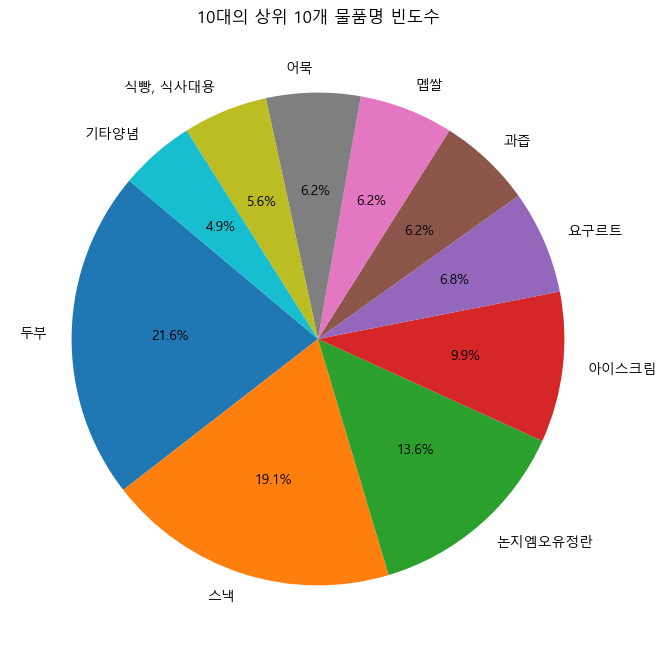

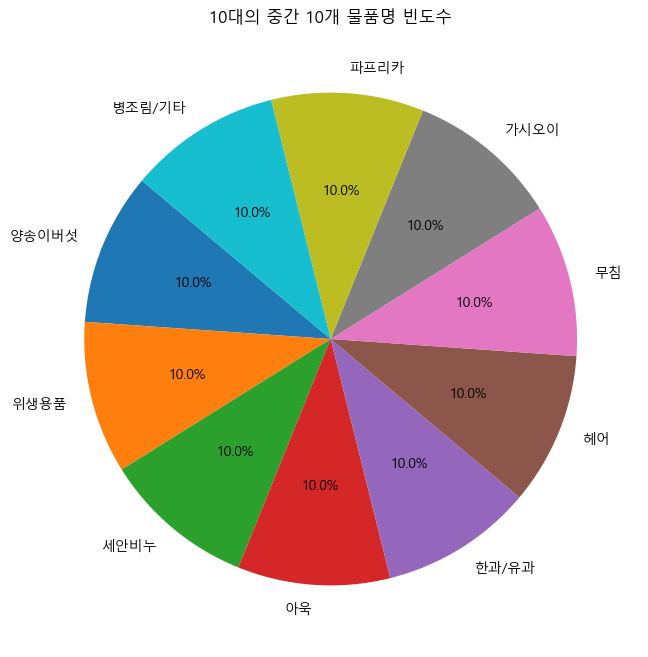

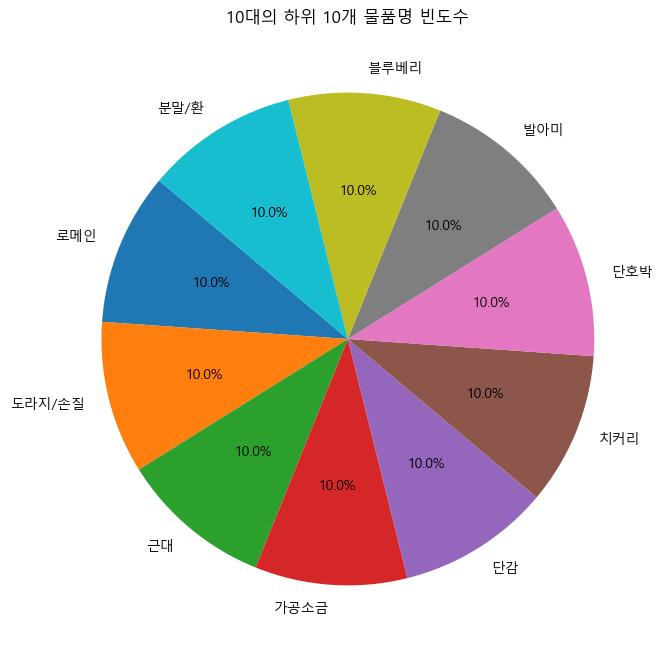

In [25]:
# 10대의 물품명 빈도수 계산
teen_item_counts = df[df['연령대'] == '10대']['물품중분류'].value_counts()

# 상위 10개의 물품명 선택
top_10_items = teen_item_counts.head(10)

# 중간 10개의 물품명 선택 (중위 -5, +5)
middle_index = len(teen_item_counts) // 2
middle_10_items = teen_item_counts.iloc[middle_index-5:middle_index+5]

# 하위 10개의 물품명 선택
bottom_10_items = teen_item_counts.tail(10)

# 파이 그래프 시각화 함수
def plot_pie_chart(data, title):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

# 상위 10개의 물품명 파이 그래프
plot_pie_chart(top_10_items, '10대의 상위 10개 물품명 빈도수')

# 중간 10개의 물품명 파이 그래프
plot_pie_chart(middle_10_items, '10대의 중간 10개 물품명 빈도수')

# 하위 10개의 물품명 파이 그래프
plot_pie_chart(bottom_10_items, '10대의 하위 10개 물품명 빈도수')

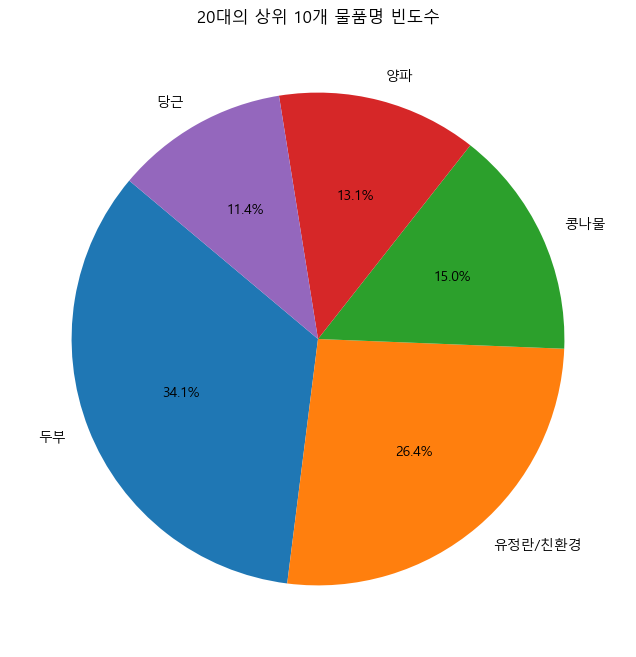

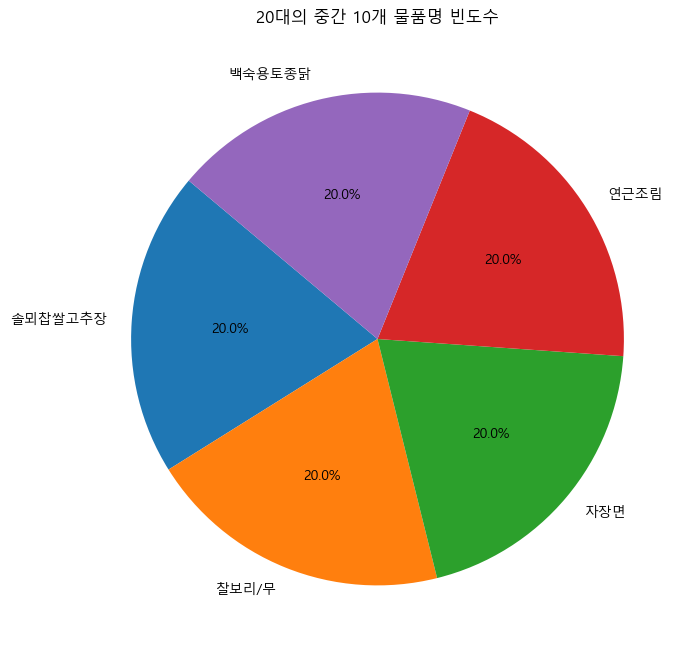

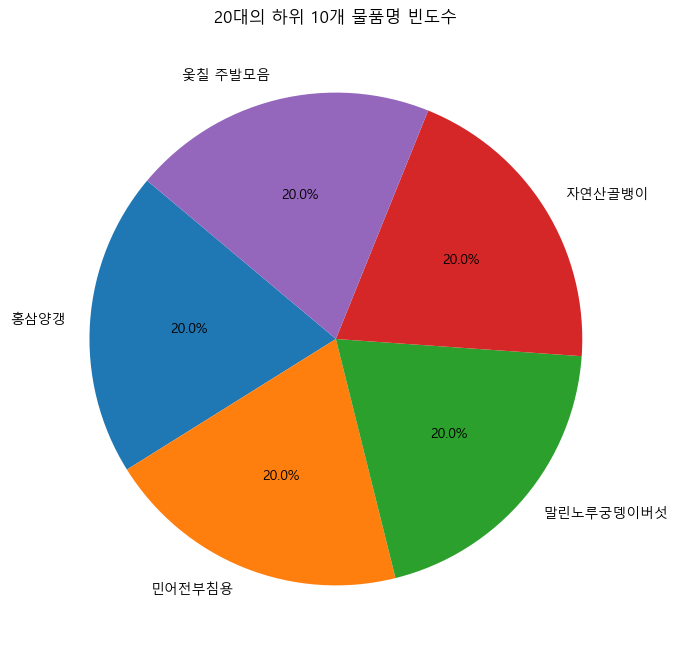

In [26]:
# 10대의 물품명 빈도수 계산
teen_item_counts = df[df['연령대'] == '20대']['물품명'].value_counts()

# 상위 10개의 물품명 선택
top_10_items = teen_item_counts.head(5)

# 중간 10개의 물품명 선택 (중위 -5, +5)
middle_index = len(teen_item_counts) // 2
middle_10_items = teen_item_counts.iloc[middle_index-2:middle_index+3]

# 하위 10개의 물품명 선택
bottom_10_items = teen_item_counts.tail(5)

# 파이 그래프 시각화 함수
def plot_pie_chart(data, title):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

# 상위 10개의 물품명 파이 그래프
plot_pie_chart(top_10_items, '20대의 상위 10개 물품명 빈도수')

# 중간 10개의 물품명 파이 그래프
plot_pie_chart(middle_10_items, '20대의 중간 10개 물품명 빈도수')

# 하위 10개의 물품명 파이 그래프
plot_pie_chart(bottom_10_items, '20대의 하위 10개 물품명 빈도수')

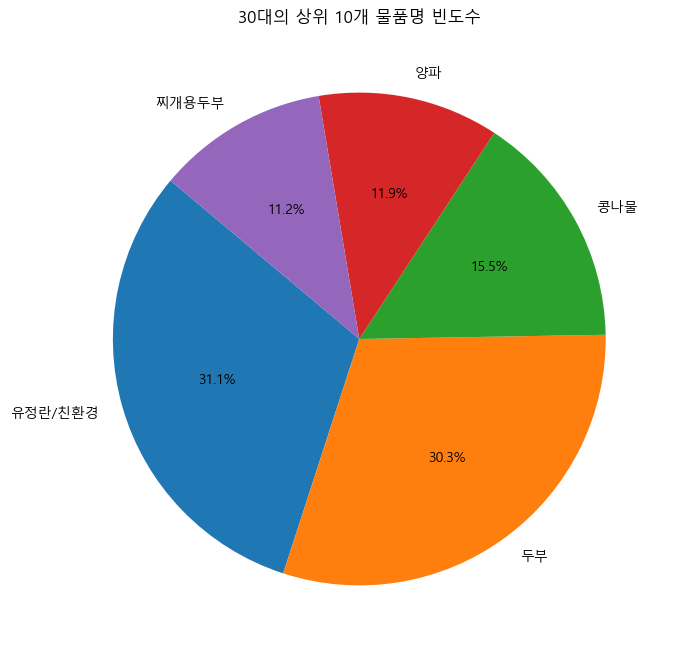

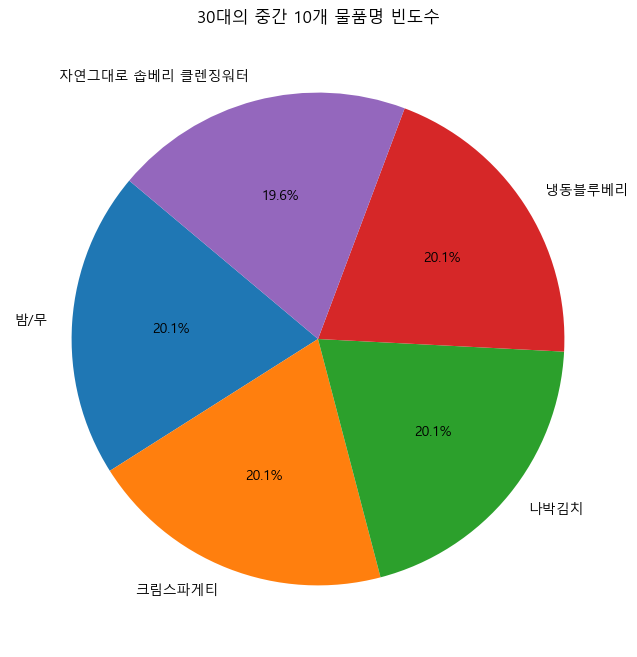

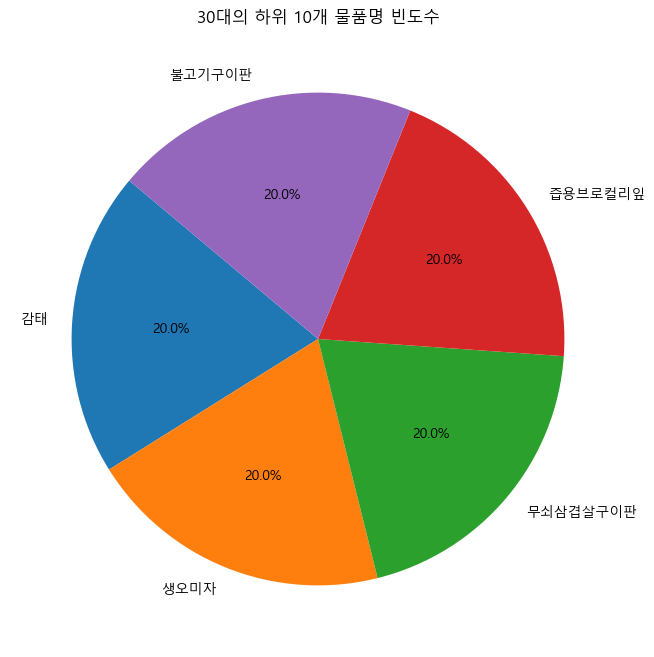

In [27]:
# 10대의 물품명 빈도수 계산
teen_item_counts = df[df['연령대'] == '30대']['물품명'].value_counts()

# 상위 10개의 물품명 선택
top_10_items = teen_item_counts.head(5)

# 중간 10개의 물품명 선택 (중위 -5, +5)
middle_index = len(teen_item_counts) // 2
middle_10_items = teen_item_counts.iloc[middle_index-2:middle_index+3]

# 하위 10개의 물품명 선택
bottom_10_items = teen_item_counts.tail(5)

# 파이 그래프 시각화 함수
def plot_pie_chart(data, title):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

# 상위 10개의 물품명 파이 그래프
plot_pie_chart(top_10_items, '30대의 상위 10개 물품명 빈도수')

# 중간 10개의 물품명 파이 그래프
plot_pie_chart(middle_10_items, '30대의 중간 10개 물품명 빈도수')

# 하위 10개의 물품명 파이 그래프
plot_pie_chart(bottom_10_items, '30대의 하위 10개 물품명 빈도수')

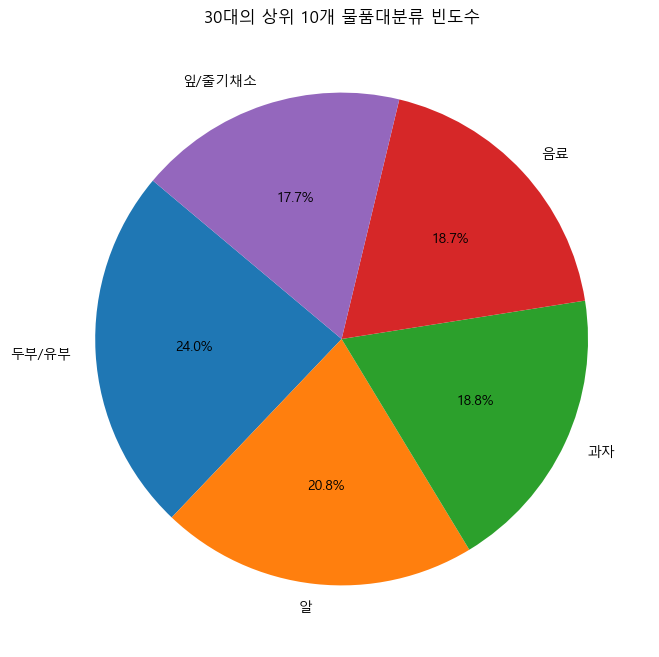

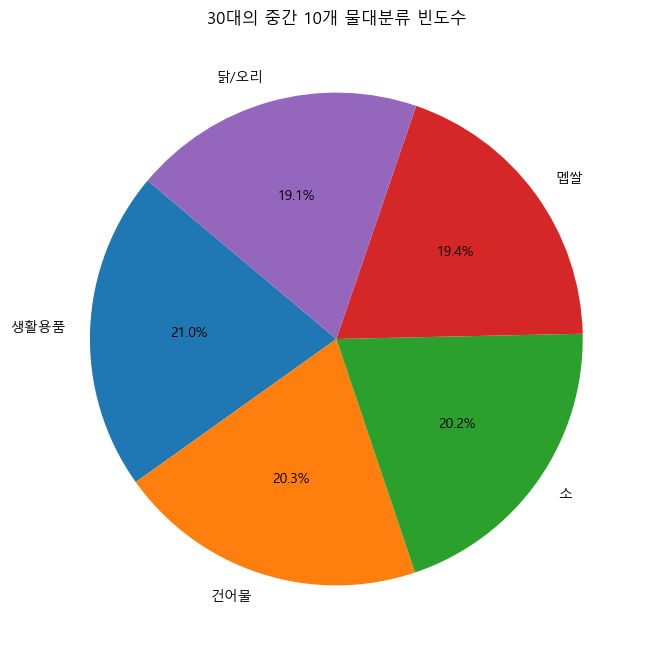

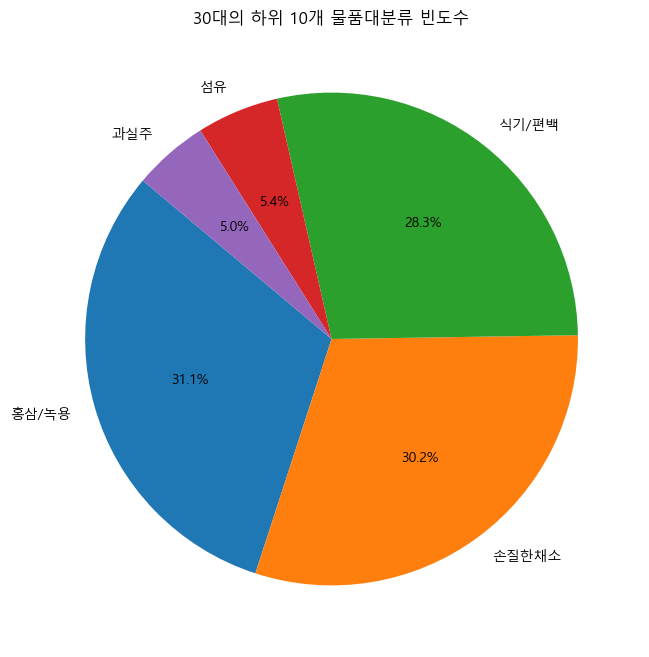

In [28]:
# 10대의 물품명 빈도수 계산
teen_item_counts = df[df['연령대'] == '30대']['물품대분류'].value_counts()

# 상위 10개의 물품명 선택
top_10_items = teen_item_counts.head(5)

# 중간 10개의 물품명 선택 (중위 -5, +5)
middle_index = len(teen_item_counts) // 2
middle_10_items = teen_item_counts.iloc[middle_index-2:middle_index+3]

# 하위 10개의 물품명 선택
bottom_10_items = teen_item_counts.tail(5)

# 파이 그래프 시각화 함수
def plot_pie_chart(data, title):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

# 상위 10개의 물품명 파이 그래프
plot_pie_chart(top_10_items, '30대의 상위 10개 물품대분류 빈도수')

# 중간 10개의 물품명 파이 그래프
plot_pie_chart(middle_10_items, '30대의 중간 10개 물대분류 빈도수')

# 하위 10개의 물품명 파이 그래프
plot_pie_chart(bottom_10_items, '30대의 하위 10개 물품대분류 빈도수')

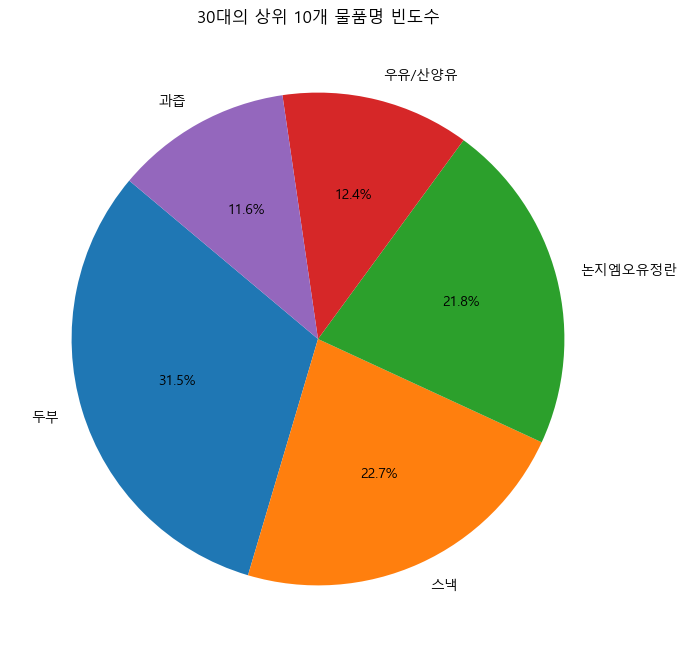

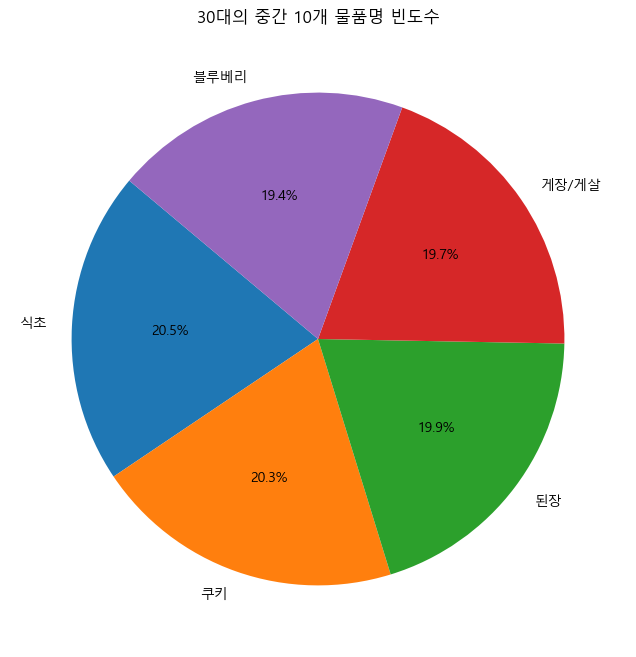

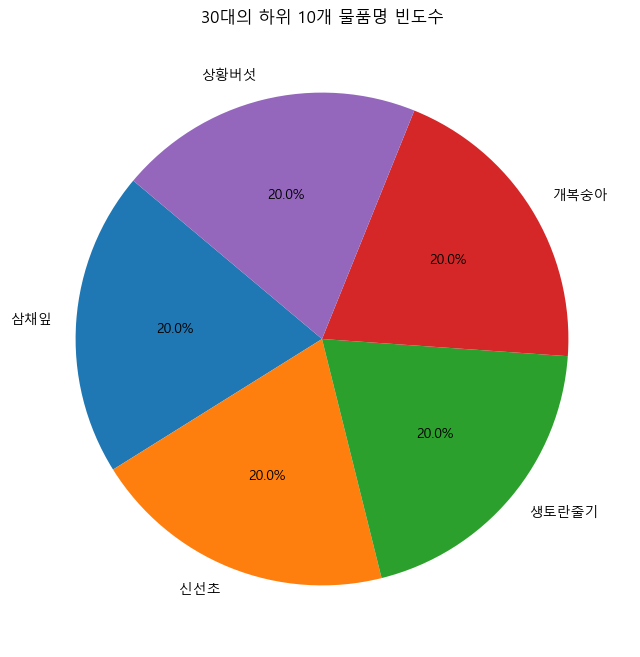

In [29]:
# 10대의 물품명 빈도수 계산
teen_item_counts = df[df['연령대'] == '30대']['물품중분류'].value_counts()

# 상위 10개의 물품명 선택
top_10_items = teen_item_counts.head(5)

# 중간 10개의 물품명 선택 (중위 -5, +5)
middle_index = len(teen_item_counts) // 2
middle_10_items = teen_item_counts.iloc[middle_index-2:middle_index+3]

# 하위 10개의 물품명 선택
bottom_10_items = teen_item_counts.tail(5)

# 파이 그래프 시각화 함수
def plot_pie_chart(data, title):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

# 상위 10개의 물품명 파이 그래프
plot_pie_chart(top_10_items, '30대의 상위 10개 물품명 빈도수')

# 중간 10개의 물품명 파이 그래프
plot_pie_chart(middle_10_items, '30대의 중간 10개 물품명 빈도수')

# 하위 10개의 물품명 파이 그래프
plot_pie_chart(bottom_10_items, '30대의 하위 10개 물품명 빈도수')

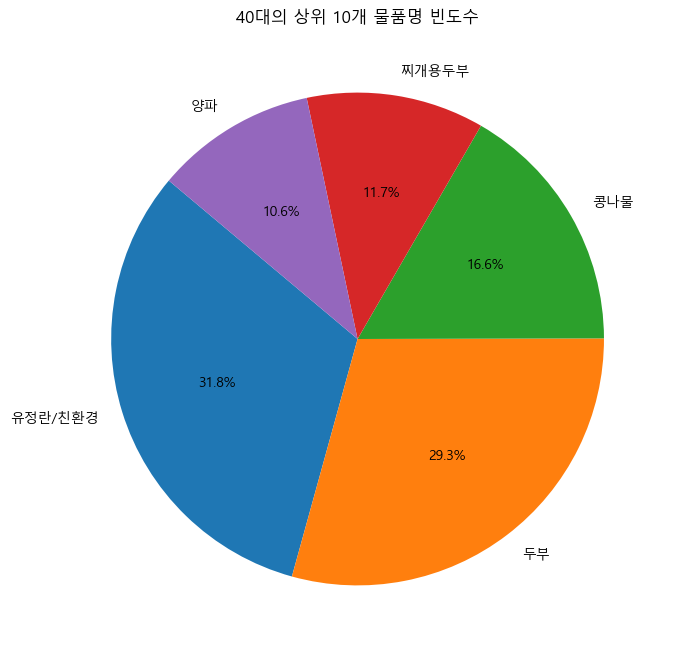

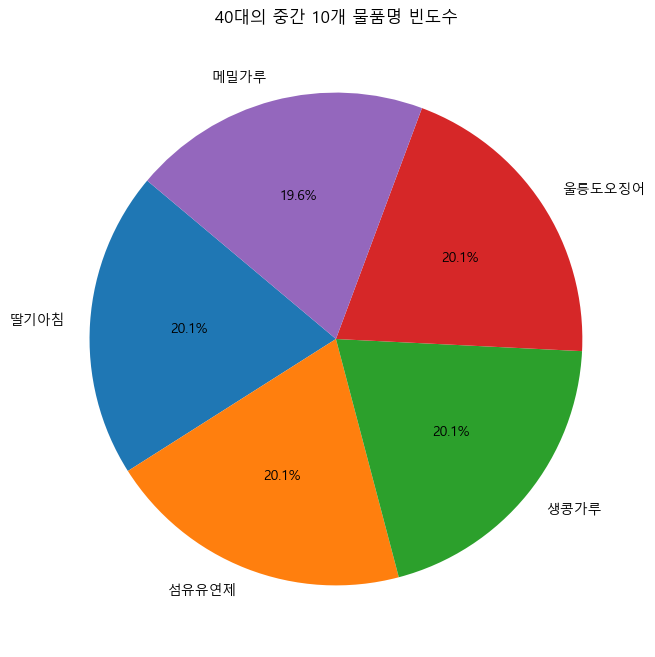

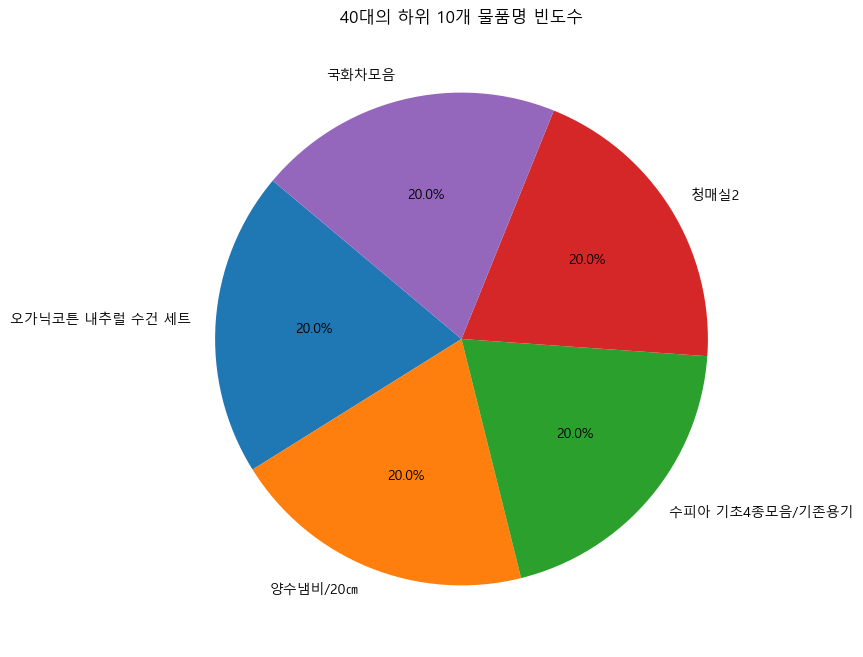

In [30]:
# 10대의 물품명 빈도수 계산
teen_item_counts = df[df['연령대'] == '40대']['물품명'].value_counts()

# 상위 10개의 물품명 선택
top_10_items = teen_item_counts.head(5)

# 중간 10개의 물품명 선택 (중위 -5, +5)
middle_index = len(teen_item_counts) // 2
middle_10_items = teen_item_counts.iloc[middle_index-2:middle_index+3]

# 하위 10개의 물품명 선택
bottom_10_items = teen_item_counts.tail(5)

# 파이 그래프 시각화 함수
def plot_pie_chart(data, title):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

# 상위 10개의 물품명 파이 그래프
plot_pie_chart(top_10_items, '40대의 상위 10개 물품명 빈도수')

# 중간 10개의 물품명 파이 그래프
plot_pie_chart(middle_10_items, '40대의 중간 10개 물품명 빈도수')

# 하위 10개의 물품명 파이 그래프
plot_pie_chart(bottom_10_items, '40대의 하위 10개 물품명 빈도수')

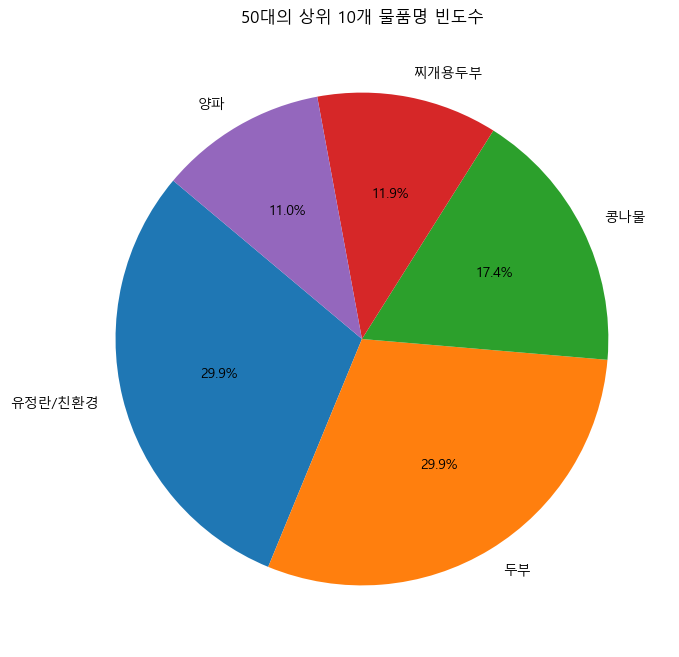

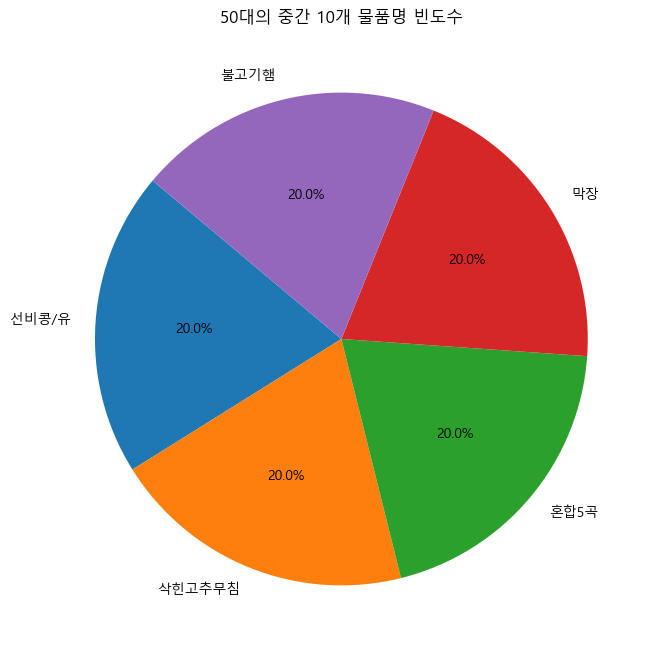

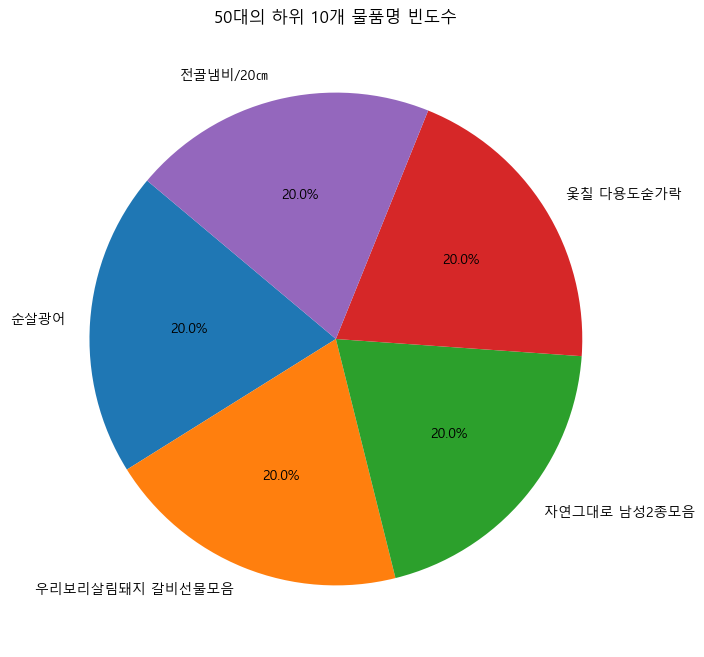

In [31]:
# 10대의 물품명 빈도수 계산
teen_item_counts = df[df['연령대'] == '50대']['물품명'].value_counts()

# 상위 10개의 물품명 선택
top_10_items = teen_item_counts.head(5)

# 중간 10개의 물품명 선택 (중위 -5, +5)
middle_index = len(teen_item_counts) // 2
middle_10_items = teen_item_counts.iloc[middle_index-2:middle_index+3]

# 하위 10개의 물품명 선택
bottom_10_items = teen_item_counts.tail(5)

# 파이 그래프 시각화 함수
def plot_pie_chart(data, title):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

# 상위 10개의 물품명 파이 그래프
plot_pie_chart(top_10_items, '50대의 상위 10개 물품명 빈도수')

# 중간 10개의 물품명 파이 그래프
plot_pie_chart(middle_10_items, '50대의 중간 10개 물품명 빈도수')

# 하위 10개의 물품명 파이 그래프
plot_pie_chart(bottom_10_items, '50대의 하위 10개 물품명 빈도수')

In [32]:
df['연령대'].unique()

array(['30대', '40대', '60대 이상', '20대', '50대', '10대'], dtype=object)

In [33]:
df[df['연령대'] == "60대 이상"]

,Unnamed: 0,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,주문취소여부,...,물품명,물품대분류,물품중분류,식품/비식품,냉장여부,개당 구매금액,물품금액,연령대,시간대,반올림 주문시간
17,17,438814080,정상회원,1.0,13401,2022-07-22,2022-07-23 00:00:00,2022-07-23 00:00:00,0,주문완료,...,유정란/친환경,알,논지엠오유정란,0,1,13401.0,9923,60대 이상,낮,오후 12:30
18,18,438814080,정상회원,1.0,10338,2022-07-04,2022-07-04 00:00:00,2022-07-05 00:00:00,0,주문완료,...,유정란/친환경,알,논지엠오유정란,0,1,10338.0,9923,60대 이상,낮,오후 12:00
19,19,438814080,정상회원,1.0,13401,2022-05-19,2022-05-19 00:00:00,2022-05-19 00:00:00,0,주문완료,...,유정란/친환경,알,논지엠오유정란,0,1,13401.0,9923,60대 이상,저녁,오후 08:00
20,20,438814080,정상회원,1.0,7083,2022-02-15,2022-02-17 00:00:00,2022-02-18 00:00:00,0,주문완료,...,유정란/친환경,알,논지엠오유정란,0,1,7083.0,9923,60대 이상,낮,오후 02:00
21,21,438814080,정상회원,1.0,7083,2022-01-21,2022-01-21 00:00:00,2022-01-21 00:00:00,0,주문완료,...,유정란/친환경,알,논지엠오유정란,0,1,7083.0,9923,60대 이상,낮,오후 02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663024,667281,700708672,정상회원,1.0,74662,2022-02-27,2022-02-27 00:00:00,2022-02-27 00:00:00,0,주문완료,...,양귀냄비,식기/편백,옹기,1,1,74662.0,74662,60대 이상,낮,오후 01:30
663034,667291,896869312,정상회원,1.0,4403,2022-06-01,2022-06-01 00:00:00,2022-06-02 00:00:00,0,주문완료,...,주방수건,생활용품,주방소품,1,1,4403.0,4403,60대 이상,낮,오후 02:30
663065,667322,341786112,정상회원,1.0,18761,2022-09-27,2022-09-27 00:00:00,2022-09-28 00:00:00,0,주문완료,...,단감/대/,과일,단감,0,1,18761.0,18761,60대 이상,낮,오후 03:30
663108,667365,686955712,정상회원,1.0,109122,2022-06-12,2022-06-13 00:00:00,2022-06-13 00:00:00,0,주문완료,...,편백나무큐브목베개모음,식기/편백,편백,0,1,109122.0,109122,60대 이상,아침,오전 09:00


In [34]:
# 60대의 물품명 빈도수 계산
teen_item_counts = df[df['연령대'] == "60대 이상"]['물품명'].value_counts()
teen_item_counts

물품명
두부               3579
유정란/친환경          3475
콩나물              1646
찌개용두부            1451
오이               1296
                 ... 
자연그대로 로즈마리 립밤       1
오가닉코튼 캐미솔           1
중하새우                1
대장부참식               1
오가닉코튼 여성용 레깅스       1
Name: count, Length: 1581, dtype: int64

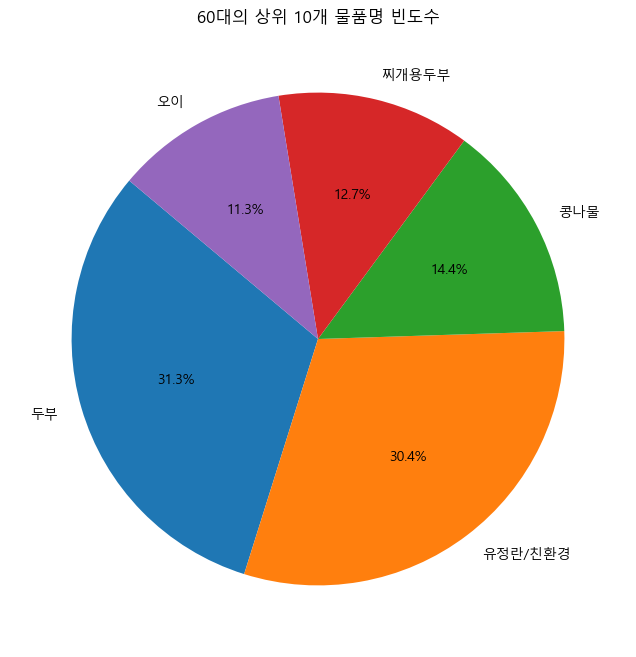

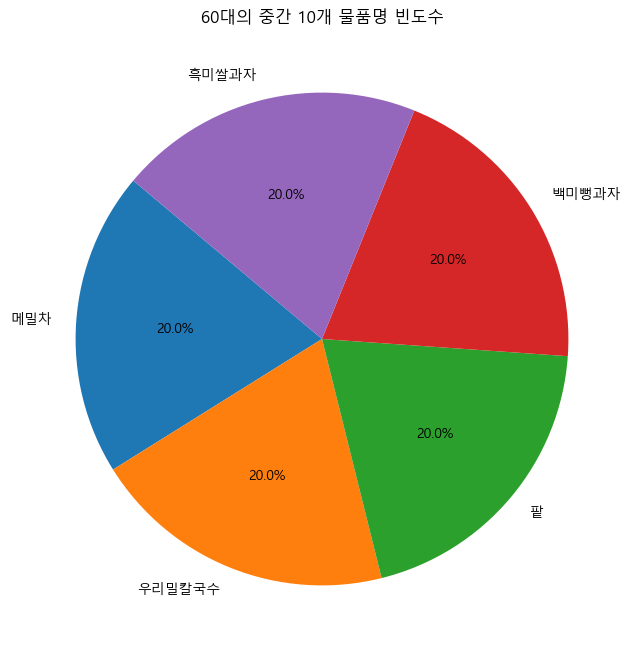

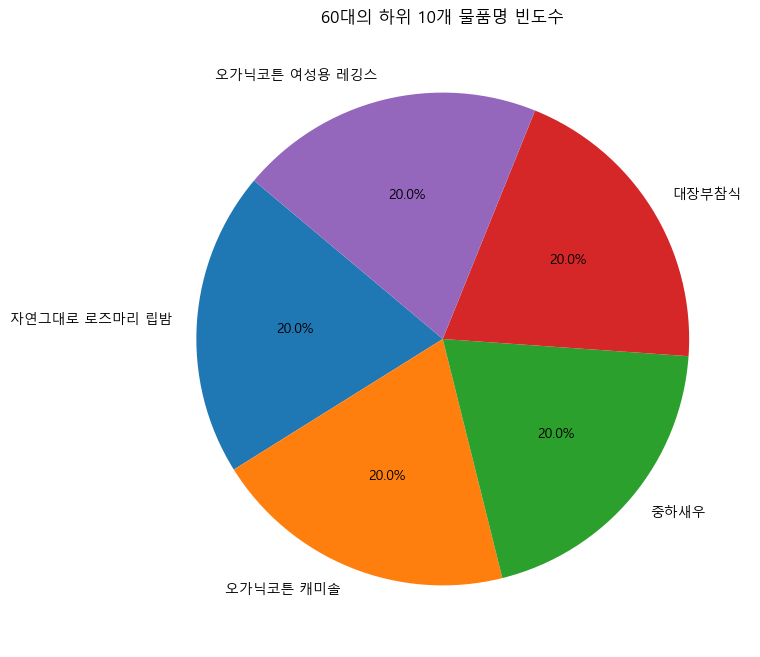

In [35]:
# 10대의 물품명 빈도수 계산
teen_item_counts = df[df['연령대'] == "60대 이상"]['물품명'].value_counts()

# 상위 10개의 물품명 선택
top_10_items = teen_item_counts.head(5)

# 중간 10개의 물품명 선택 (중위 -5, +5)
middle_index = len(teen_item_counts) // 2
middle_10_items = teen_item_counts.iloc[middle_index-2:middle_index+3]

# 하위 10개의 물품명 선택
bottom_10_items = teen_item_counts.tail(5)

# 파이 그래프 시각화 함수
def plot_pie_chart(data, title):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

# 상위 10개의 물품명 파이 그래프
plot_pie_chart(top_10_items, '60대의 상위 10개 물품명 빈도수')

# 중간 10개의 물품명 파이 그래프
plot_pie_chart(middle_10_items, '60대의 중간 10개 물품명 빈도수')

# 하위 10개의 물품명 파이 그래프
plot_pie_chart(bottom_10_items, '60대의 하위 10개 물품명 빈도수')

In [36]:
# 연령대별 물품명 빈도수 테이블 생성
contingency_table = pd.crosstab(df['연령대'], df['물품명'])

# 카이제곱 검정 수행
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

print("카이제곱 통계량:", chi2)
print("p-value:", p)

if p < 0.05:
    print("연령대와 구매품목 간에 통계적으로 유의미한 차이가 있습니다.")
else:
    print("연령대와 구매품목 간에 통계적으로 유의미한 차이가 없습니다.")

카이제곱 통계량: 64586.84782631298
p-value: 0.0
연령대와 구매품목 간에 통계적으로 유의미한 차이가 있습니다.


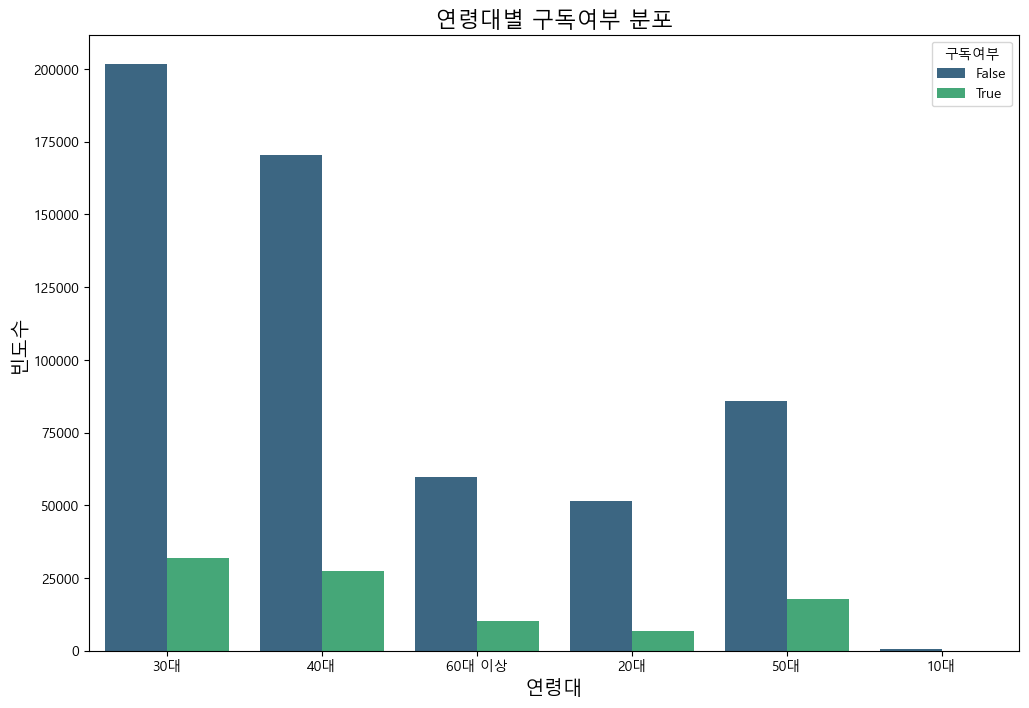

In [37]:




# 연령대별 구독여부 분포 시각화
plt.figure(figsize=(12, 8))

# countplot 생성
sns.countplot(data=df, x='연령대', hue='구독여부', palette='viridis')

# 그래프 제목 및 레이블 설정
plt.title('연령대별 구독여부 분포', fontsize=16)
plt.xlabel('연령대', fontsize=14)
plt.ylabel('빈도수', fontsize=14)
plt.legend(title='구독여부')

# 그래프 출력
plt.show()


In [38]:
# 연령대별 구독여부 교차표 생성
contingency_table = pd.crosstab(df['연령대'], df['구독여부'])

# 카이제곱 검정 수행
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

# 결과 출력
print("카이제곱 통계량:", chi2)
print("p-value:", p)
print("자유도:", dof)
print("기대 빈도수:\n", ex)

# 결과 해석
if p < 0.05:
    print("연령대와 구독여부 간에 통계적으로 유의미한 차이가 있습니다.")
else:
    print("연령대와 구독여부 간에 통계적으로 유의미한 차이가 없습니다.")

카이제곱 통계량: 1196.5549248370367
p-value: 1.6375915763549917e-256
자유도: 5
기대 빈도수:
 [[4.10355118e+02 6.76448824e+01]
 [4.98624392e+04 8.21956080e+03]
 [2.00414692e+05 3.30373077e+04]
 [1.69733350e+05 2.79796499e+04]
 [8.88041097e+04 1.46388903e+04]
 [6.00440536e+04 9.89794638e+03]]
연령대와 구독여부 간에 통계적으로 유의미한 차이가 있습니다.


In [39]:
df

,Unnamed: 0,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,주문취소여부,...,물품명,물품대분류,물품중분류,식품/비식품,냉장여부,개당 구매금액,물품금액,연령대,시간대,반올림 주문시간
0,0,1032097472,정상회원,1.0,7083,2022-01-08,-,-,0,주문취소,...,유정란/친환경,알,논지엠오유정란,0,1,7083.0,9923,30대,낮,오후 01:00
1,1,1032097472,정상회원,1.0,10338,2022-09-16,2022-09-17 00:00:00,2022-09-18 00:00:00,0,주문완료,...,유정란/친환경,알,논지엠오유정란,0,1,10338.0,9923,30대,밤,오후 10:00
2,2,1032097472,정상회원,1.0,10338,2022-06-18,2022-06-18 00:00:00,2022-06-18 00:00:00,0,주문완료,...,유정란/친환경,알,논지엠오유정란,0,1,10338.0,9923,30대,저녁,오후 08:00
3,3,1032097472,정상회원,1.0,10338,2022-04-02,2022-04-02 00:00:00,2022-04-02 00:00:00,0,주문완료,...,유정란/친환경,알,논지엠오유정란,0,1,10338.0,9923,30대,저녁,오후 07:30
4,4,1032097472,정상회원,1.0,8615,2022-05-07,2022-05-07 00:00:00,2022-05-08 00:00:00,0,주문완료,...,유정란/친환경,알,논지엠오유정란,0,1,8615.0,9923,30대,낮,오후 03:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663105,667362,734192768,정상회원,1.0,30631,2022-05-01,2022-05-02 00:00:00,2022-05-03 00:00:00,0,주문완료,...,불고기구이판,식기/편백,옹기,1,1,30631.0,30631,30대,밤,오전 12:30
663106,667363,1352610112,정상회원,1.0,122523,2022-10-31,2022-10-31 00:00:00,2022-10-31 00:00:00,0,주문완료,...,옻칠 주발모음,식기/편백,옻칠,0,1,122523.0,122523,20대,밤,오전 02:30
663107,667364,1556603072,정상회원,1.0,56475,2022-10-29,2022-10-29 00:00:00,2022-10-31 00:00:00,0,주문완료,...,국화차모음,차,잎꽃차,0,1,56475.0,56475,40대,아침,오전 08:00
663108,667365,686955712,정상회원,1.0,109122,2022-06-12,2022-06-13 00:00:00,2022-06-13 00:00:00,0,주문완료,...,편백나무큐브목베개모음,식기/편백,편백,0,1,109122.0,109122,60대 이상,아침,오전 09:00


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663110 entries, 0 to 663109
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   663110 non-null  int64  
 1   회원번호         663110 non-null  int64  
 2   회원상태         663110 non-null  object 
 3   구매수량         663110 non-null  float64
 4   구매금액         663110 non-null  int64  
 5   주문일시         663110 non-null  object 
 6   배송시작일        663110 non-null  object 
 7   배송완료일        663110 non-null  object 
 8   사용 적립금       663110 non-null  int64  
 9   주문취소여부       663110 non-null  object 
 10  주문시간         663110 non-null  object 
 11  제품번호         663110 non-null  object 
 12  배송시작일부터완료일   663110 non-null  object 
 13  주문일시부터배송완료일  663110 non-null  object 
 14  성별           663110 non-null  object 
 15  나이           663110 non-null  int64  
 16  등록카드         663110 non-null  object 
 17  결혼           663110 non-null  object 
 18  구독여부         663110 non-

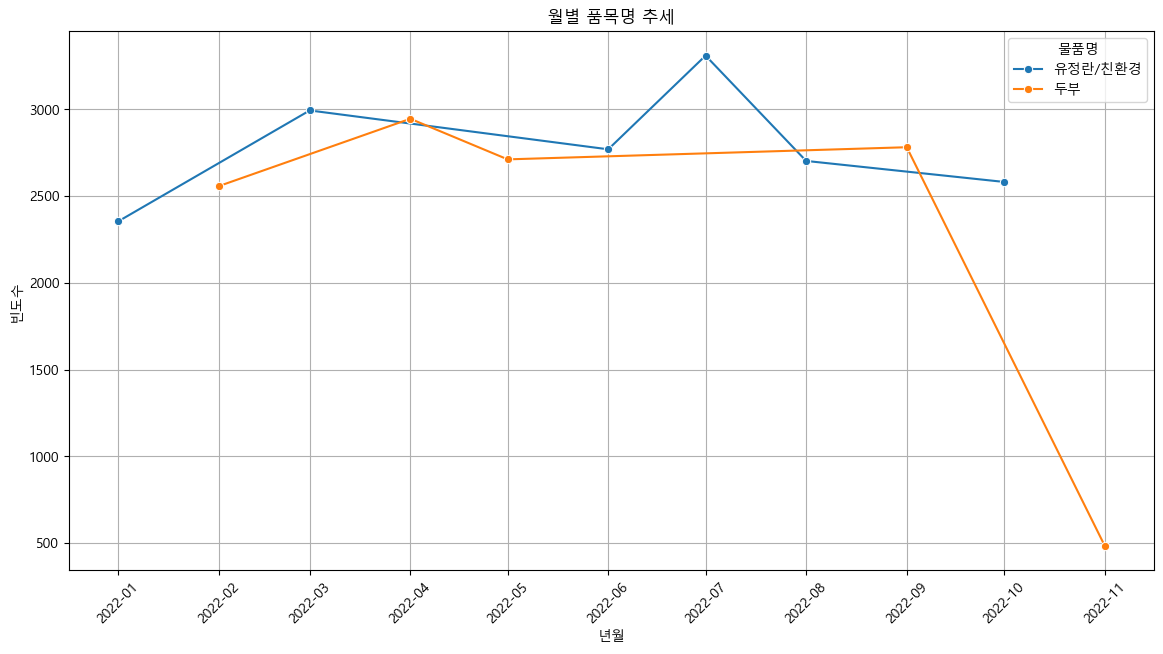

In [41]:


# '주문일시'를 datetime 형식으로 변환
df['주문일시'] = pd.to_datetime(df['주문일시'])

# 월별 집계: '주문일시'를 기준으로 '물품명' 빈도수 계산
df['년월'] = df['주문일시'].dt.to_period('M').dt.to_timestamp()  # Period를 Timestamp로 변환
monthly_counts = df.groupby(['년월', '물품명']).size().reset_index(name='빈도수')

# 각 월별로 가장 많이 판매된 품목 선택
top_items_per_month = monthly_counts.loc[monthly_counts.groupby('년월')['빈도수'].idxmax()]

# 월별 품목명 추세 시각화
plt.figure(figsize=(14, 7))
sns.lineplot(data=top_items_per_month, x='년월', y='빈도수', hue='물품명', marker='o')
plt.title('월별 품목명 추세')
plt.xlabel('년월')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.legend(title='물품명')
plt.grid(True)
plt.show()

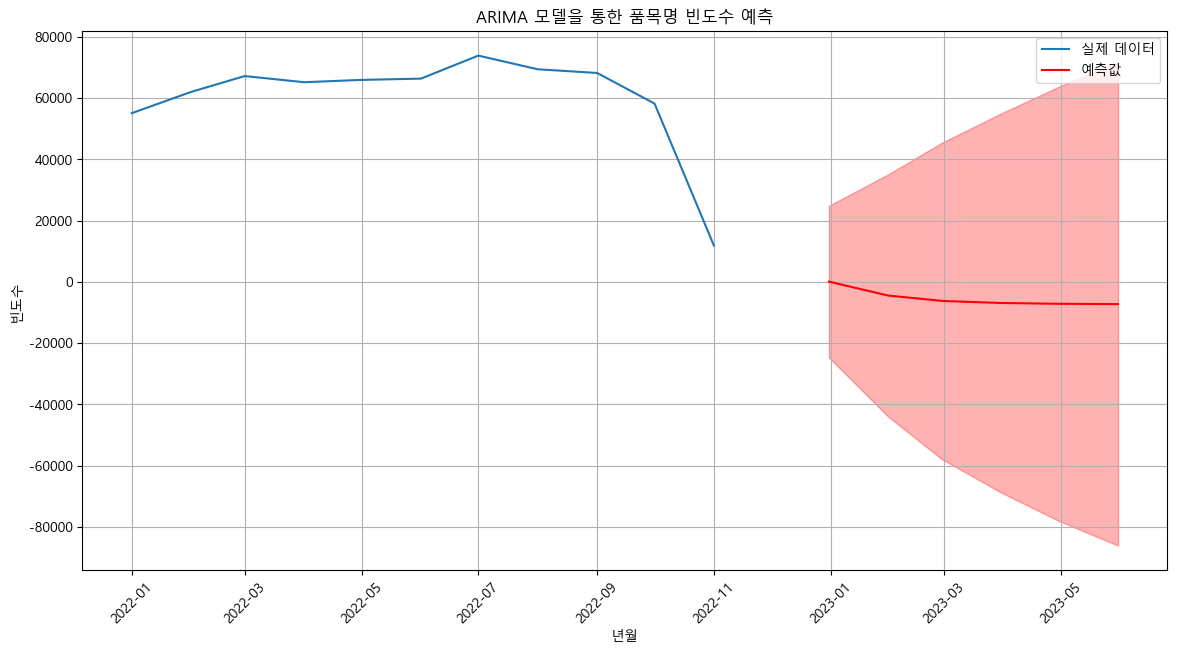

예측값:
 2022-12-01      57.527522
2023-01-01   -4486.771527
2023-02-01   -6241.813566
2023-03-01   -6919.623834
2023-04-01   -7181.399193
2023-05-01   -7282.498781
Freq: MS, Name: predicted_mean, dtype: float64
신뢰구간:
                lower 빈도수     upper 빈도수
2022-12-01 -24706.619159  24821.674204
2023-01-01 -44054.233780  35080.690726
2023-02-01 -57901.699371  45418.072240
2023-03-01 -68831.864325  54992.616657
2023-04-01 -78044.606683  63681.808296
2023-05-01 -86145.870439  71580.872877


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
# '주문일시'를 datetime 형식으로 변환
df['주문일시'] = pd.to_datetime(df['주문일시'])

# 월별 집계: '주문일시'를 기준으로 '물품명' 빈도수 계산
df['년월'] = df['주문일시'].dt.to_period('M').dt.to_timestamp()  # Period를 Timestamp로 변환
monthly_counts = df.groupby(['년월', '물품명']).size().reset_index(name='빈도수')

# 월별 품목명 빈도수 집계 (가장 많이 판매된 품목명만을 대상으로)
monthly_series = monthly_counts.groupby('년월')['빈도수'].sum()

# ARIMA 모델 학습 및 예측
model = ARIMA(monthly_series, order=(1, 1, 1))  # ARIMA(1,1,1) 모델 설정
results = model.fit()

# 예측 수행 (6개월 예측)
forecast_steps = 6
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=monthly_series.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# 결과 시각화
plt.figure(figsize=(14, 7))
plt.plot(monthly_series, label='실제 데이터')
plt.plot(forecast_index, forecast_values, color='red', label='예측값')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.title('ARIMA 모델을 통한 품목명 빈도수 예측')
plt.xlabel('년월')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# 예측 결과 출력
print("예측값:\n", forecast_values)
print("신뢰구간:\n", forecast_conf_int)

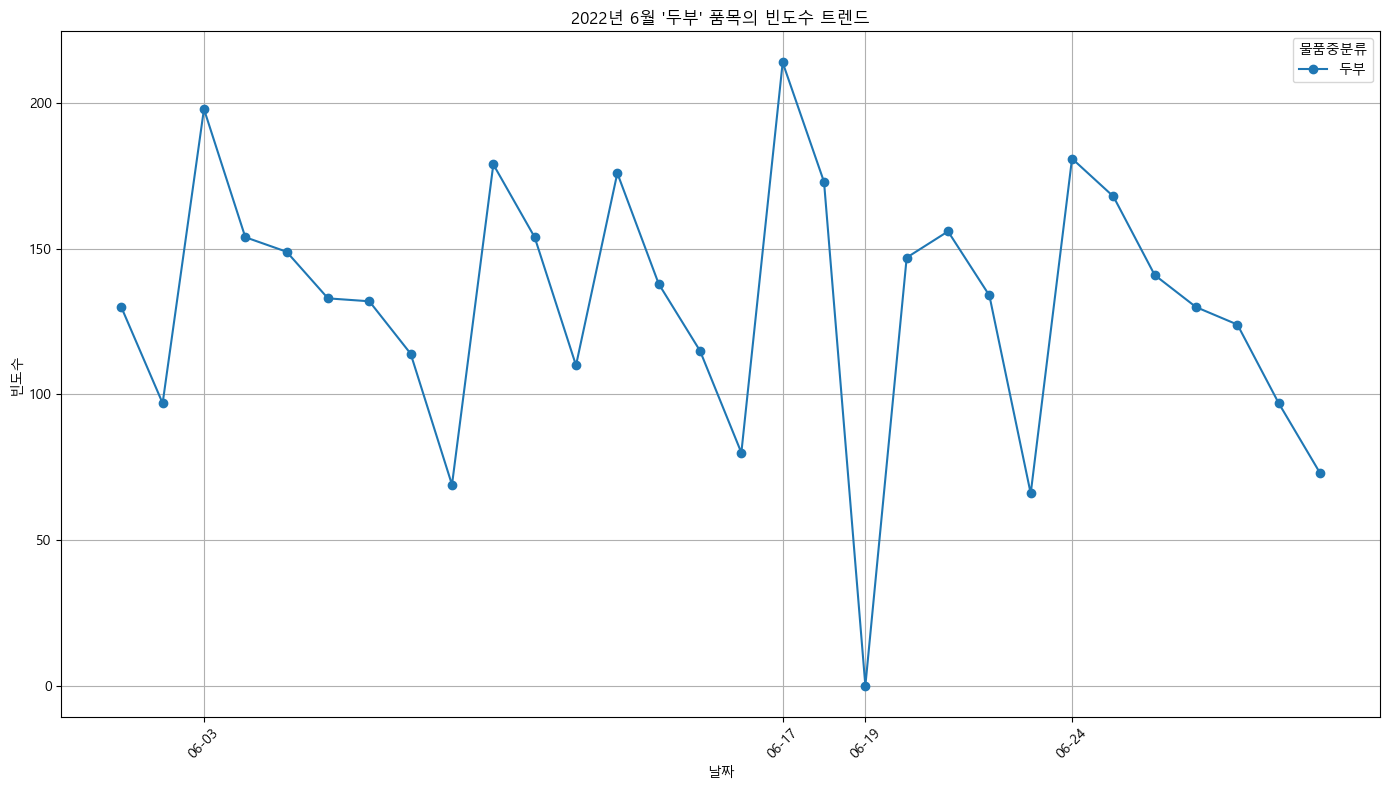

In [43]:
# 2022년 6월 데이터 필터링
df_june = df[(df['주문일시'] >= '2022-06-01') & (df['주문일시'] <= '2022-06-30')]
# '물품중분류' 칼럼의 빈도수 계산
top_items = df_june['물품중분류'].value_counts().head(3).index
# 날짜별 빈도수 계산
daily_counts = df_june.groupby(['주문일시', '물품중분류']).size().unstack(fill_value=0)
daily_counts = daily_counts.reindex(pd.date_range(start='2022-06-01', end='2022-06-30'), fill_value=0)
daily_counts = daily_counts[top_items]
# '두부' 품목의 빈도수에서 최저점과 최고점의 날짜 찾기
item_to_plot = '두부'
if item_to_plot in daily_counts.columns:
    # 빈도수가 가장 높은 날짜와 가장 낮은 날짜를 찾기
    min_date = daily_counts[item_to_plot].idxmin()
    max_dates = daily_counts[item_to_plot].nlargest(3).index  # 빈도수가 가장 높은 3개 날짜
    # 빈도수의 최저점과 최고점 날짜를 포함한 날짜 리스트 생성
    highlight_dates = list(max_dates) + [min_date]
    highlight_dates = sorted(set(highlight_dates))  # 중복 제거 및 정렬
    # 트렌드 차트 시각화
    plt.figure(figsize=(14, 8))
    # '두부' 품목의 트렌드 차트 그리기
    plt.plot(daily_counts.index, daily_counts[item_to_plot], marker='o', label=item_to_plot)
    # x축 날짜 레이블 조정
    date_labels = [date.strftime('%m-%d') for date in highlight_dates]
    plt.xticks(ticks=highlight_dates, labels=date_labels, rotation=45)
    plt.title('2022년 6월 \'두부\' 품목의 빈도수 트렌드')
    plt.xlabel('날짜')
    plt.ylabel('빈도수')
    plt.legend(title='물품중분류')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"'{item_to_plot}' 품목이 2022년 6월 데이터에 없습니다.")

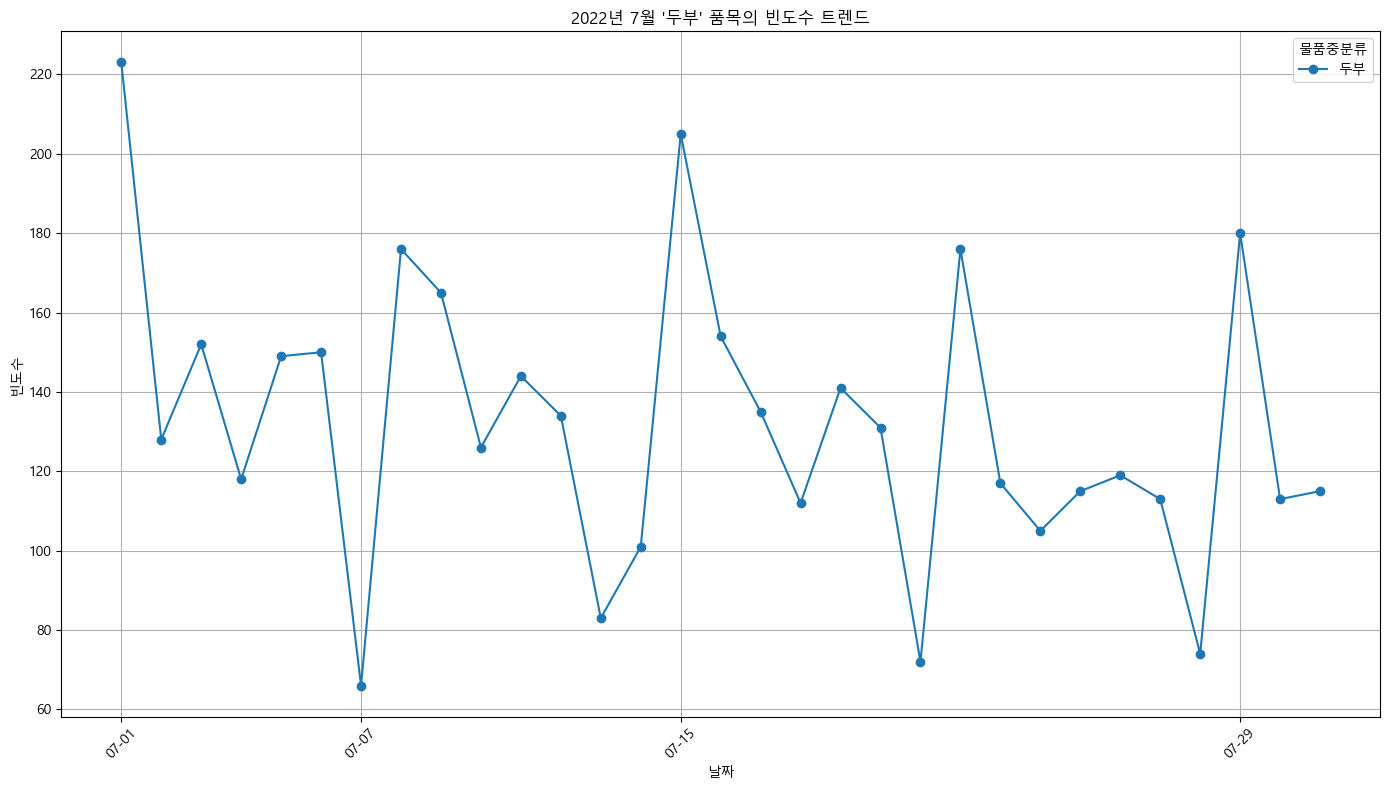

In [44]:
# 2022년 6월 데이터 필터링
df_june = df[(df['주문일시'] >= '2022-07-01') & (df['주문일시'] <= '2022-07-31')]
# '물품중분류' 칼럼의 빈도수 계산
top_items = df_june['물품중분류'].value_counts().head(3).index
# 날짜별 빈도수 계산
daily_counts = df_june.groupby(['주문일시', '물품중분류']).size().unstack(fill_value=0)
daily_counts = daily_counts.reindex(pd.date_range(start='2022-07-01', end='2022-07-31'), fill_value=0)
daily_counts = daily_counts[top_items]
# '두부' 품목의 빈도수에서 최저점과 최고점의 날짜 찾기
item_to_plot = '두부'
if item_to_plot in daily_counts.columns:
    # 빈도수가 가장 높은 날짜와 가장 낮은 날짜를 찾기
    min_date = daily_counts[item_to_plot].idxmin()
    max_dates = daily_counts[item_to_plot].nlargest(3).index  # 빈도수가 가장 높은 3개 날짜
    # 빈도수의 최저점과 최고점 날짜를 포함한 날짜 리스트 생성
    highlight_dates = list(max_dates) + [min_date]
    highlight_dates = sorted(set(highlight_dates))  # 중복 제거 및 정렬
    # 트렌드 차트 시각화
    plt.figure(figsize=(14, 8))
    # '두부' 품목의 트렌드 차트 그리기
    plt.plot(daily_counts.index, daily_counts[item_to_plot], marker='o', label=item_to_plot)
    # x축 날짜 레이블 조정
    date_labels = [date.strftime('%m-%d') for date in highlight_dates]
    plt.xticks(ticks=highlight_dates, labels=date_labels, rotation=45)
    plt.title('2022년 7월 \'두부\' 품목의 빈도수 트렌드')
    plt.xlabel('날짜')
    plt.ylabel('빈도수')
    plt.legend(title='물품중분류')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"'{item_to_plot}' 품목이 2022년 6월 데이터에 없습니다.")

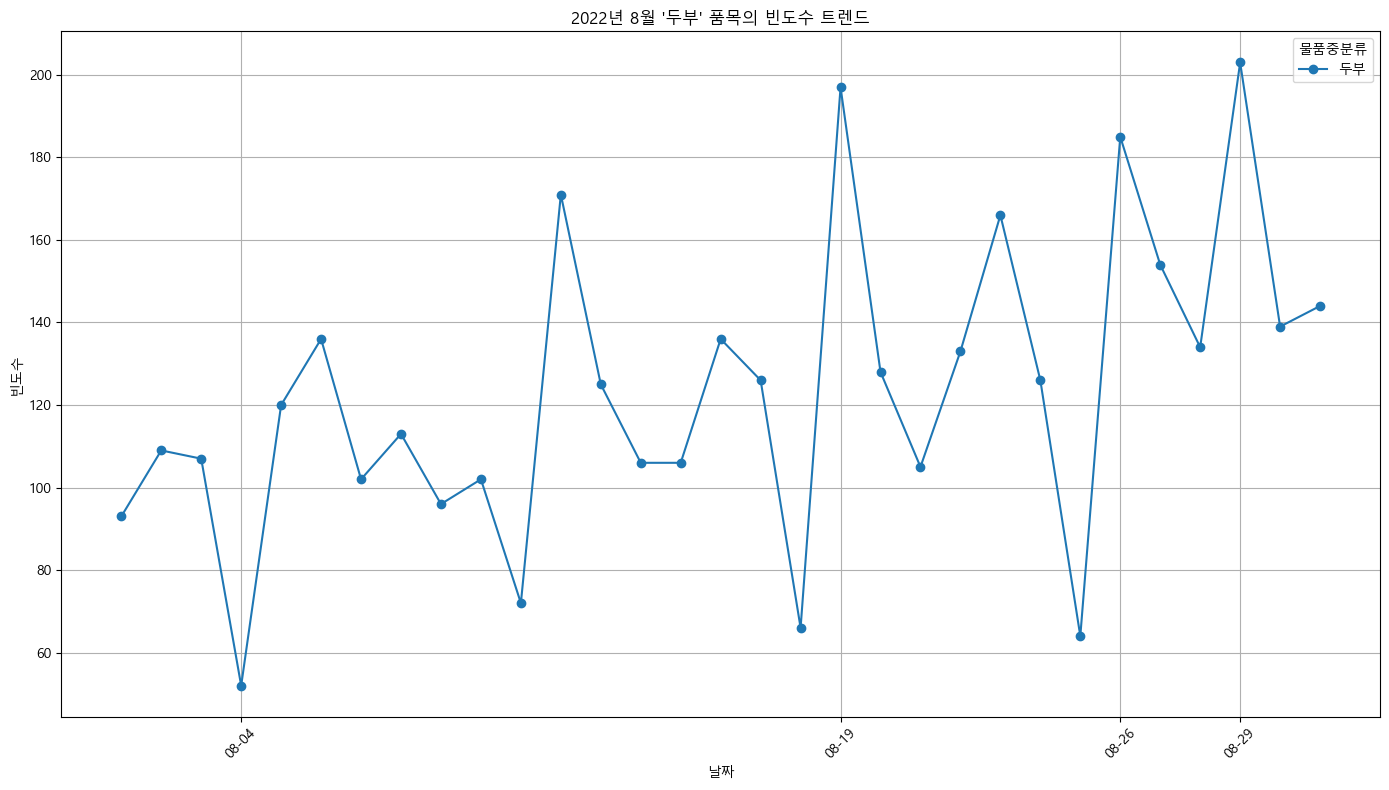

In [45]:
# 2022년 6월 데이터 필터링
df_june = df[(df['주문일시'] >= '2022-08-01') & (df['주문일시'] <= '2022-08-31')]
# '물품중분류' 칼럼의 빈도수 계산
top_items = df_june['물품중분류'].value_counts().head(3).index
# 날짜별 빈도수 계산
daily_counts = df_june.groupby(['주문일시', '물품중분류']).size().unstack(fill_value=0)
daily_counts = daily_counts.reindex(pd.date_range(start='2022-08-01', end='2022-08-31'), fill_value=0)
daily_counts = daily_counts[top_items]
# '두부' 품목의 빈도수에서 최저점과 최고점의 날짜 찾기
item_to_plot = '두부'
if item_to_plot in daily_counts.columns:
    # 빈도수가 가장 높은 날짜와 가장 낮은 날짜를 찾기
    min_date = daily_counts[item_to_plot].idxmin()
    max_dates = daily_counts[item_to_plot].nlargest(3).index  # 빈도수가 가장 높은 3개 날짜
    # 빈도수의 최저점과 최고점 날짜를 포함한 날짜 리스트 생성
    highlight_dates = list(max_dates) + [min_date]
    highlight_dates = sorted(set(highlight_dates))  # 중복 제거 및 정렬
    # 트렌드 차트 시각화
    plt.figure(figsize=(14, 8))
    # '두부' 품목의 트렌드 차트 그리기
    plt.plot(daily_counts.index, daily_counts[item_to_plot], marker='o', label=item_to_plot)
    # x축 날짜 레이블 조정
    date_labels = [date.strftime('%m-%d') for date in highlight_dates]
    plt.xticks(ticks=highlight_dates, labels=date_labels, rotation=45)
    plt.title('2022년 8월 \'두부\' 품목의 빈도수 트렌드')
    plt.xlabel('날짜')
    plt.ylabel('빈도수')
    plt.legend(title='물품중분류')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"'{item_to_plot}' 품목이 2022년 8월 데이터에 없습니다.")

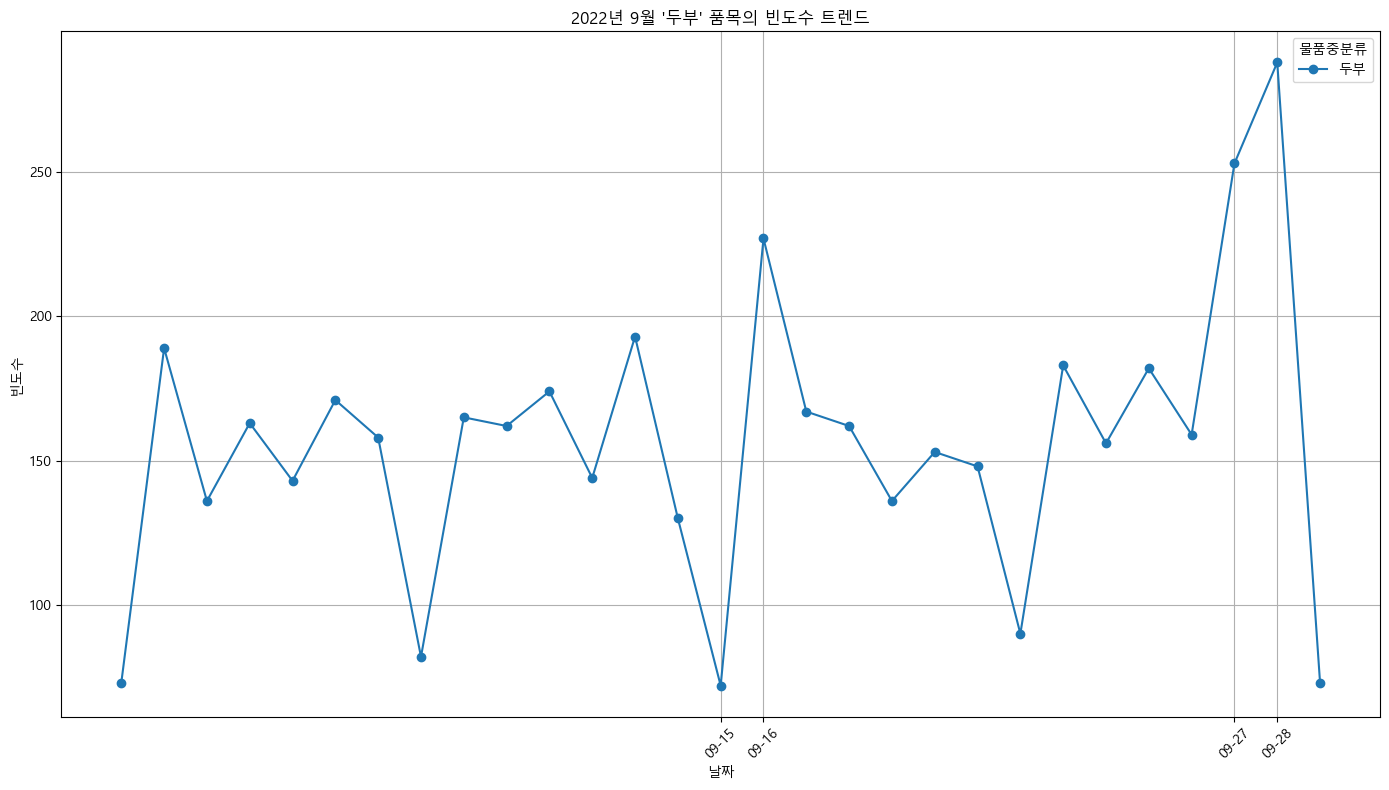

In [46]:
# 2022년 6월 데이터 필터링
df_june = df[(df['주문일시'] >= '2022-09-01') & (df['주문일시'] <= '2022-09-29')]
# '물품중분류' 칼럼의 빈도수 계산
top_items = df_june['물품중분류'].value_counts().head(3).index
# 날짜별 빈도수 계산
daily_counts = df_june.groupby(['주문일시', '물품중분류']).size().unstack(fill_value=0)
daily_counts = daily_counts.reindex(pd.date_range(start='2022-09-01', end='2022-09-29'), fill_value=0)
daily_counts = daily_counts[top_items]
# '두부' 품목의 빈도수에서 최저점과 최고점의 날짜 찾기
item_to_plot = '두부'
if item_to_plot in daily_counts.columns:
    # 빈도수가 가장 높은 날짜와 가장 낮은 날짜를 찾기
    min_date = daily_counts[item_to_plot].idxmin()
    max_dates = daily_counts[item_to_plot].nlargest(3).index  # 빈도수가 가장 높은 3개 날짜
    # 빈도수의 최저점과 최고점 날짜를 포함한 날짜 리스트 생성
    highlight_dates = list(max_dates) + [min_date]
    highlight_dates = sorted(set(highlight_dates))  # 중복 제거 및 정렬
    # 트렌드 차트 시각화
    plt.figure(figsize=(14, 8))
    # '두부' 품목의 트렌드 차트 그리기
    plt.plot(daily_counts.index, daily_counts[item_to_plot], marker='o', label=item_to_plot)
    # x축 날짜 레이블 조정
    date_labels = [date.strftime('%m-%d') for date in highlight_dates]
    plt.xticks(ticks=highlight_dates, labels=date_labels, rotation=45)
    plt.title('2022년 9월 \'두부\' 품목의 빈도수 트렌드')
    plt.xlabel('날짜')
    plt.ylabel('빈도수')
    plt.legend(title='물품중분류')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"'{item_to_plot}' 품목이 2022년 9월 데이터에 없습니다.")

In [106]:
# 2022년 6월 데이터 필터링
df_june = df[(df['주문일시'] >= '2022-01-08') & (df['주문일시'] <= '2022-11-06')]
# '물품중분류' 칼럼의 빈도수 계산
top_items = df_june['물품명'].value_counts().head(3).index
# 날짜별 빈도수 계산
daily_counts = df_june.groupby(['주문일시', '물품명']).size().unstack(fill_value=0)
daily_counts = daily_counts.reindex(pd.date_range(start='2022-01-08', end='2022-11-06'), fill_value=0)
daily_counts = daily_counts[top_items]
# '두부' 품목의 빈도수에서 최저점과 최고점의 날짜 찾기
item_to_plot = '올리고당'
if item_to_plot in daily_counts.columns:
    # 빈도수가 가장 높은 날짜와 가장 낮은 날짜를 찾기
    min_date = daily_counts[item_to_plot].idxmin()
    max_dates = daily_counts[item_to_plot].nlargest(3).index  # 빈도수가 가장 높은 3개 날짜
    # 빈도수의 최저점과 최고점 날짜를 포함한 날짜 리스트 생성
    highlight_dates = list(max_dates) + [min_date]
    highlight_dates = sorted(set(highlight_dates))  # 중복 제거 및 정렬
    # 트렌드 차트 시각화
    plt.figure(figsize=(14, 8))
    # '두부' 품목의 트렌드 차트 그리기
    plt.plot(daily_counts.index, daily_counts[item_to_plot], marker='o', label=item_to_plot)
    # x축 날짜 레이블 조정
    date_labels = [date.strftime('%m-%d') for date in highlight_dates]
    plt.xticks(ticks=highlight_dates, labels=date_labels, rotation=45)
    plt.title('2022년 10월~11월 초 \'두부\' 품목의 빈도수 트렌드')
    plt.xlabel('날짜')
    plt.ylabel('빈도수')
    plt.legend(title='물품명')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"'{item_to_plot}' 품목이 2022년 10월 데이터에 없습니다.")

'올리고당' 품목이 2022년 10월 데이터에 없습니다.


In [48]:
# '주문일시' 열의 고유 값을 정렬하고 DataFrame으로 변환
unique_dates = pd.DataFrame(df['주문일시'].sort_values().unique(), columns=['주문일시'])

# 테이블 형태로 출력
pd.set_option('display.max_rows', None)  # 모든 행 출력
print(unique_dates)

          주문일시
0   2022-01-08
1   2022-01-09
2   2022-01-10
3   2022-01-11
4   2022-01-12
5   2022-01-13
6   2022-01-14
7   2022-01-15
8   2022-01-16
9   2022-01-17
10  2022-01-18
11  2022-01-19
12  2022-01-20
13  2022-01-21
14  2022-01-22
15  2022-01-23
16  2022-01-24
17  2022-01-25
18  2022-01-26
19  2022-01-27
20  2022-01-28
21  2022-01-29
22  2022-01-30
23  2022-01-31
24  2022-02-01
25  2022-02-02
26  2022-02-03
27  2022-02-04
28  2022-02-05
29  2022-02-06
30  2022-02-07
31  2022-02-08
32  2022-02-09
33  2022-02-10
34  2022-02-11
35  2022-02-12
36  2022-02-13
37  2022-02-14
38  2022-02-15
39  2022-02-16
40  2022-02-17
41  2022-02-18
42  2022-02-19
43  2022-02-20
44  2022-02-21
45  2022-02-25
46  2022-02-26
47  2022-02-27
48  2022-02-28
49  2022-03-01
50  2022-03-02
51  2022-03-03
52  2022-03-04
53  2022-03-05
54  2022-03-06
55  2022-03-07
56  2022-03-08
57  2022-03-09
58  2022-03-10
59  2022-03-11
60  2022-03-12
61  2022-03-13
62  2022-03-14
63  2022-03-15
64  2022-03-16
65  2022-0